### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [1]:
# Importing required library
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Reading the housing data
df= pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [3]:
#statistics of numeric variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# checking shape
df.shape

(1460, 81)

In [5]:
#checking non-Null Count and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Checking for Null values
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
## Checking the percentage of Null values
pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing']).sort_values(by=['missing'], ascending=False).head(38)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [8]:
# handling  the NaN Values based on the description provided 
df['PoolQC'] = df['PoolQC'].fillna('No_Pool')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('No_Alley_Access')
df['Fence'] = df['Fence'].fillna('No_Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No_Fireplace')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['Electrical'] = df['Electrical'].fillna("Other")

In [9]:
basement_cols=['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond']
for col in basement_cols:
    df[col] =df[col].fillna('No_Basement')
garbage_cols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garbage_cols:
    df[col] = df[col].fillna('No_Garage')

In [10]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [11]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [12]:
# Dropping ID Columns 
df.drop('Id', axis=1, inplace=True)

In [13]:
## Dropping the LotFontgage columns because it contains more null values
df.drop("LotFrontage",axis = 1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Uni and Bi variate Analysis

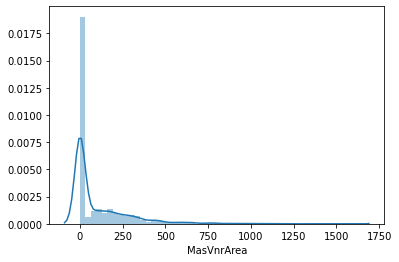

In [15]:
#Seeing distribution plot of MasVnrArea which has missing values
sns.distplot(df['MasVnrArea'])
plt.show()

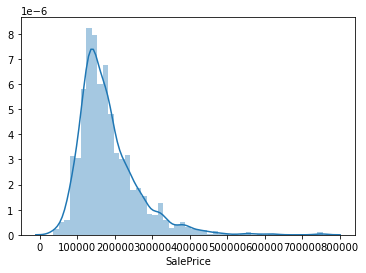

In [16]:
sns.distplot(df['SalePrice'])

Text(0.5, 1.0, 'Basement Condition')

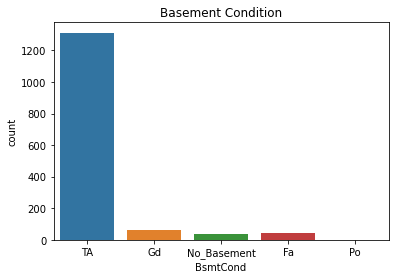

In [17]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data=df)
plt.title('Basement Condition')

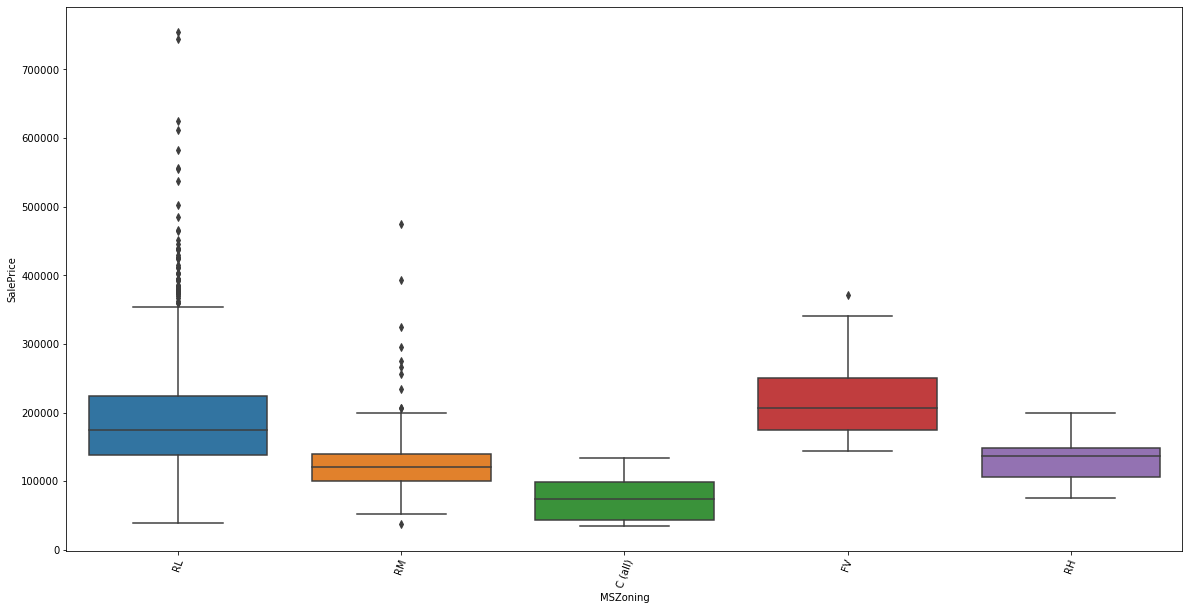

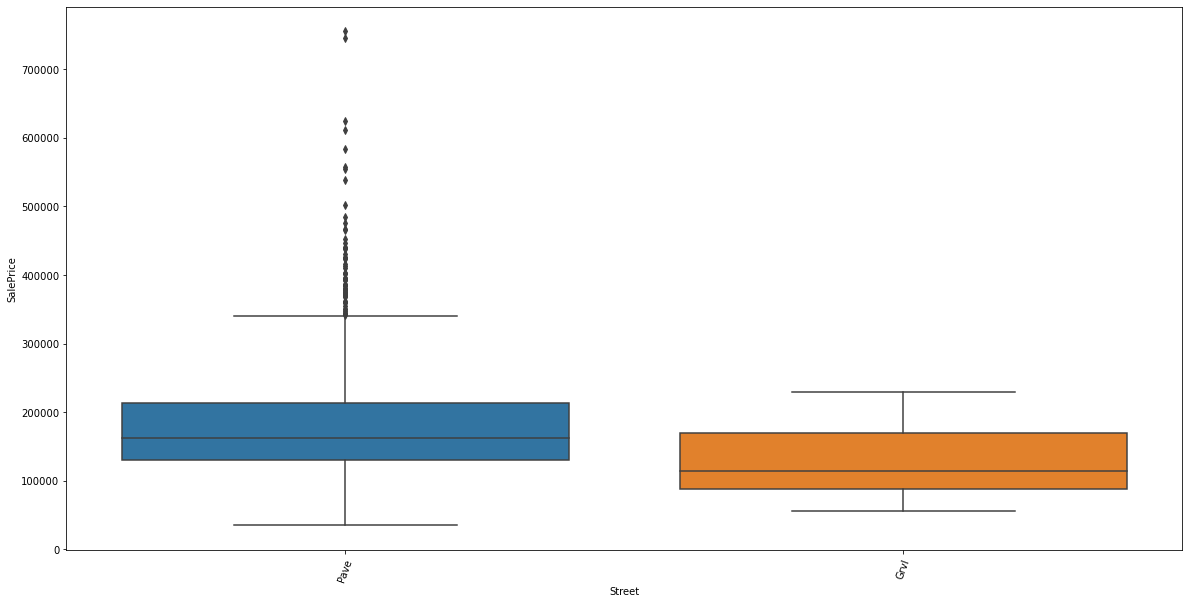

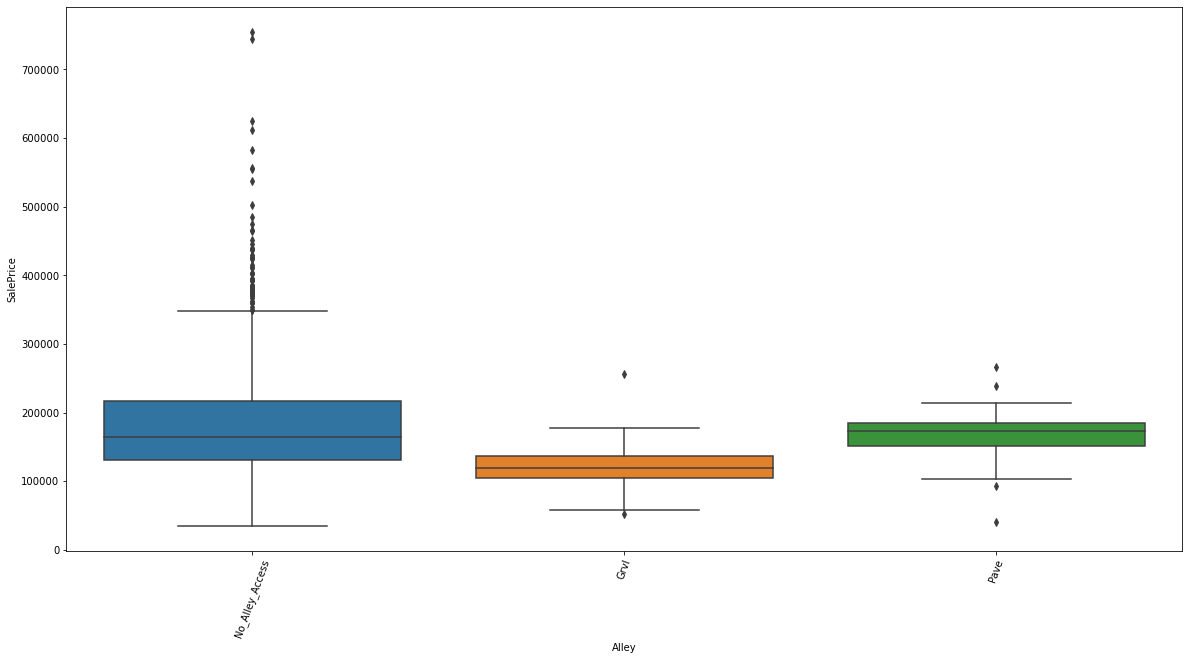

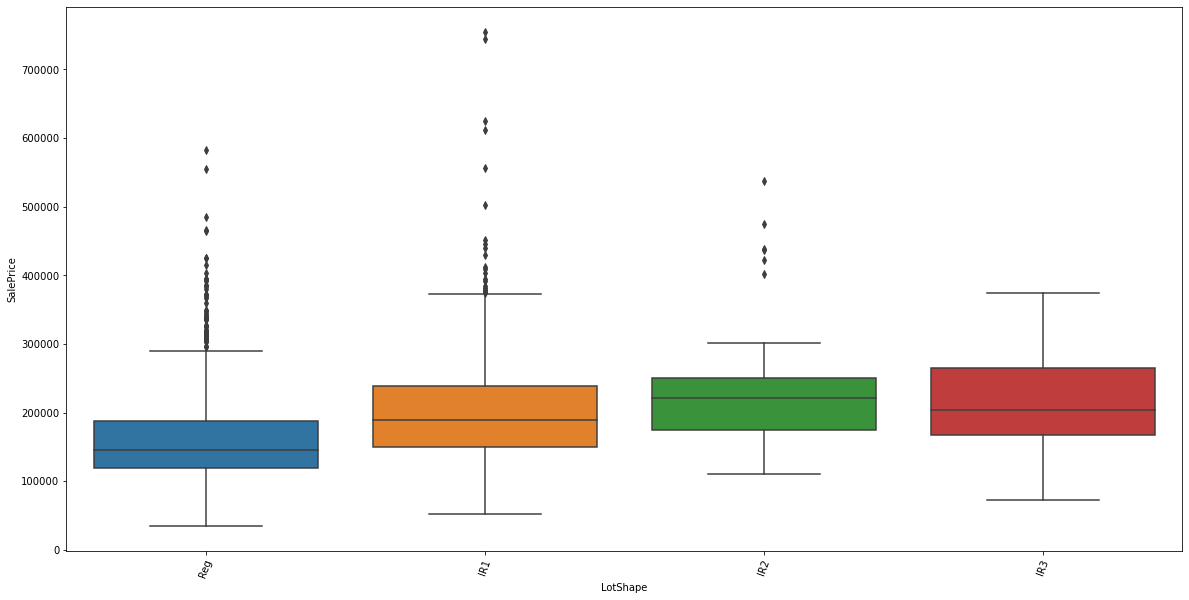

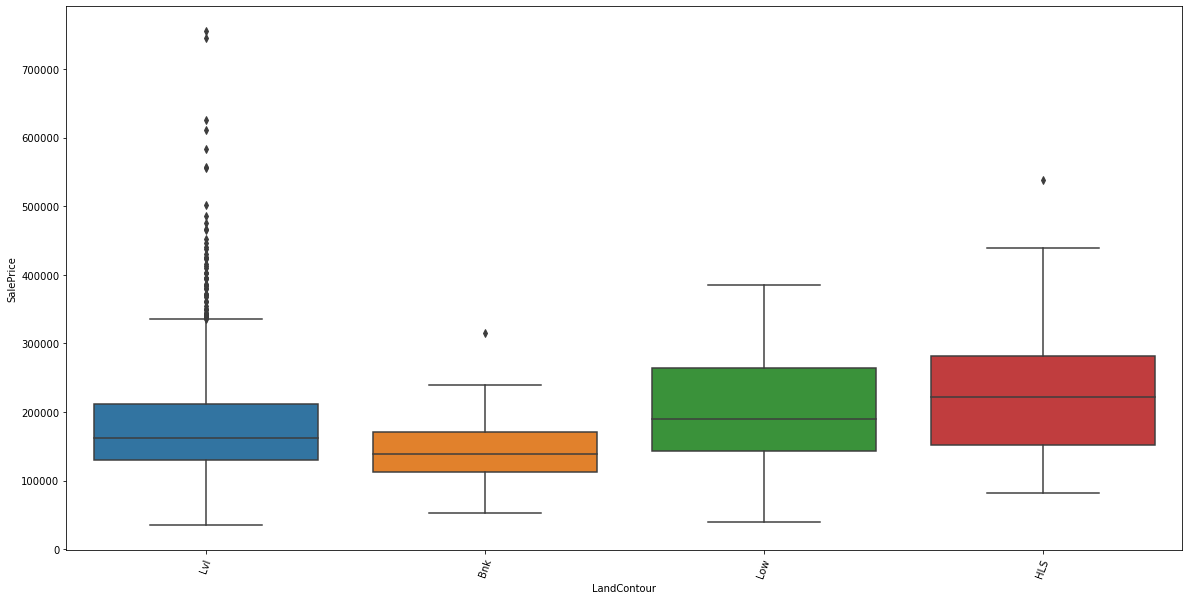

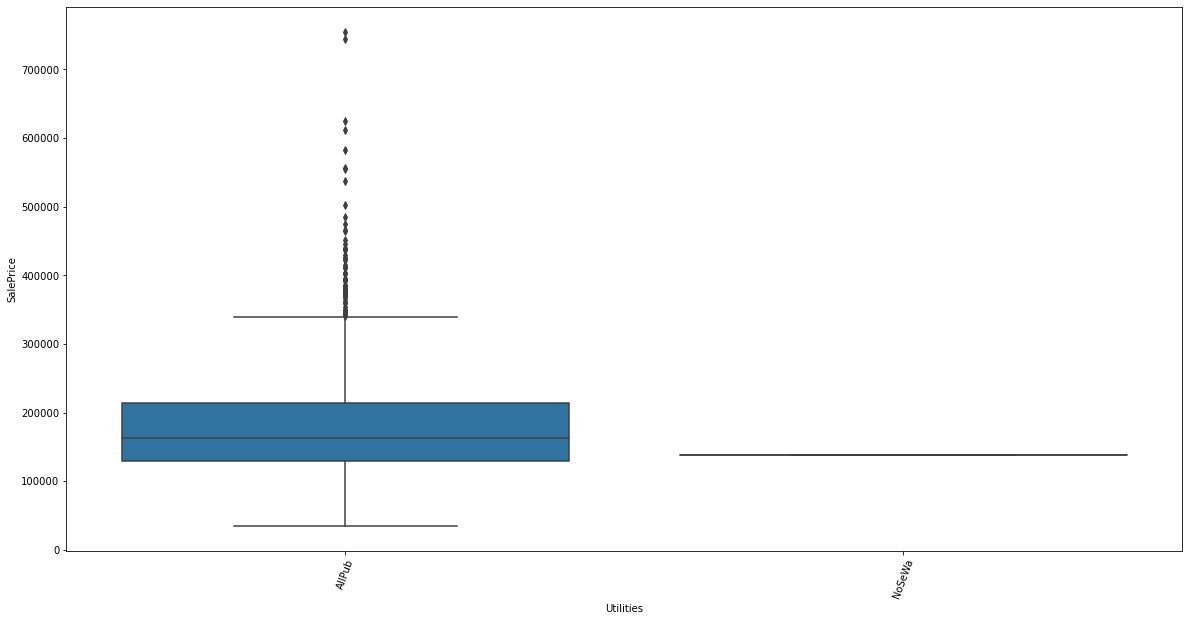

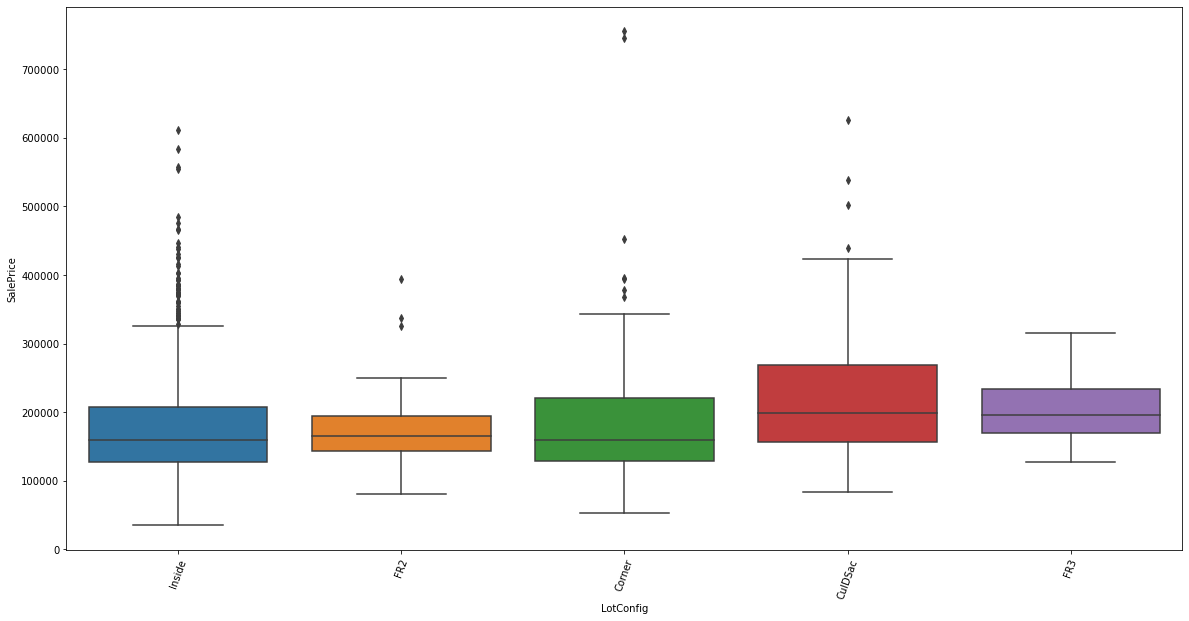

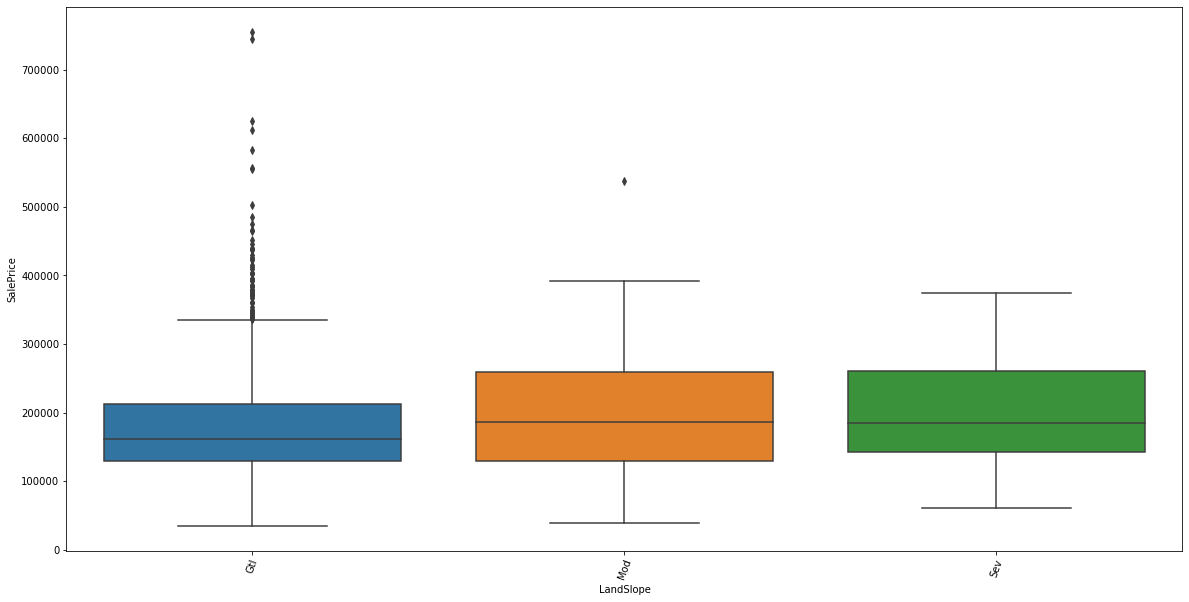

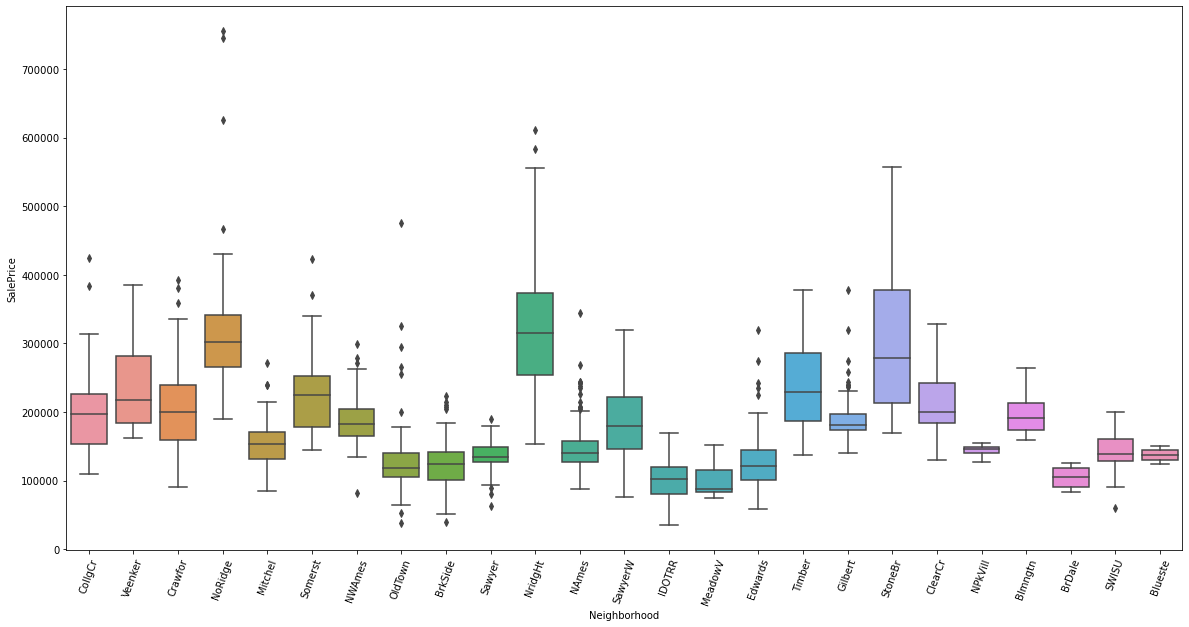

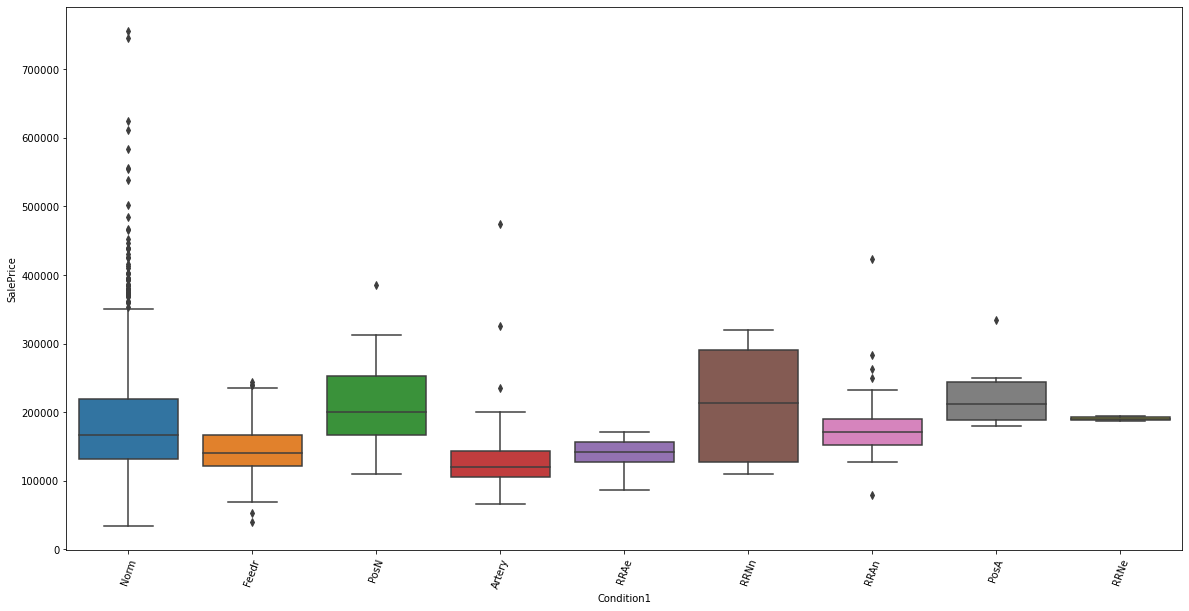

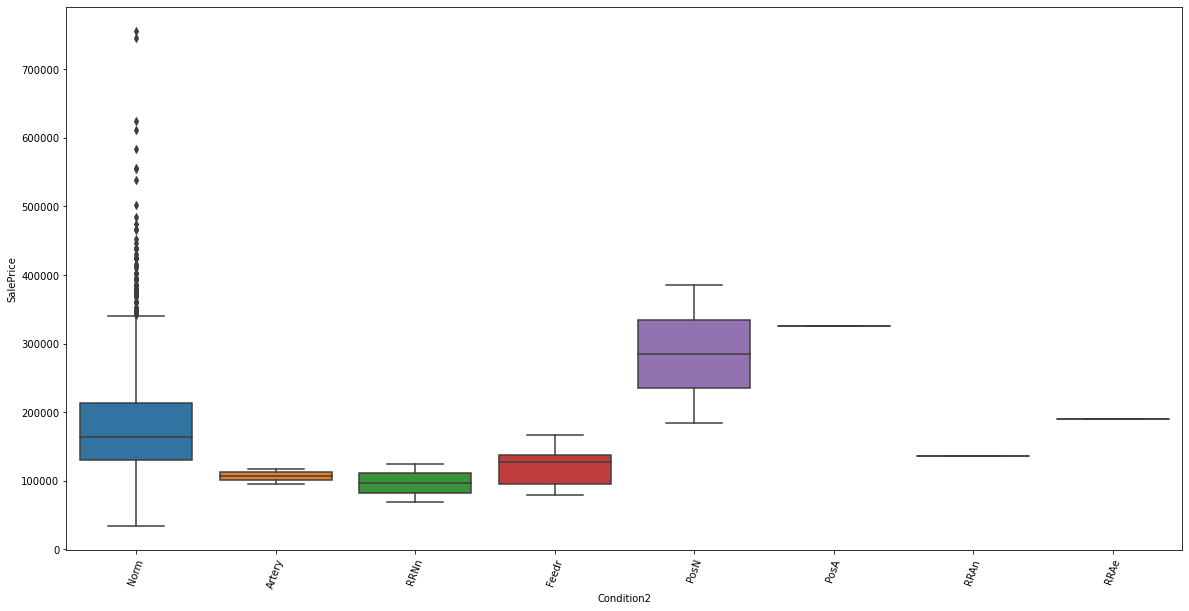

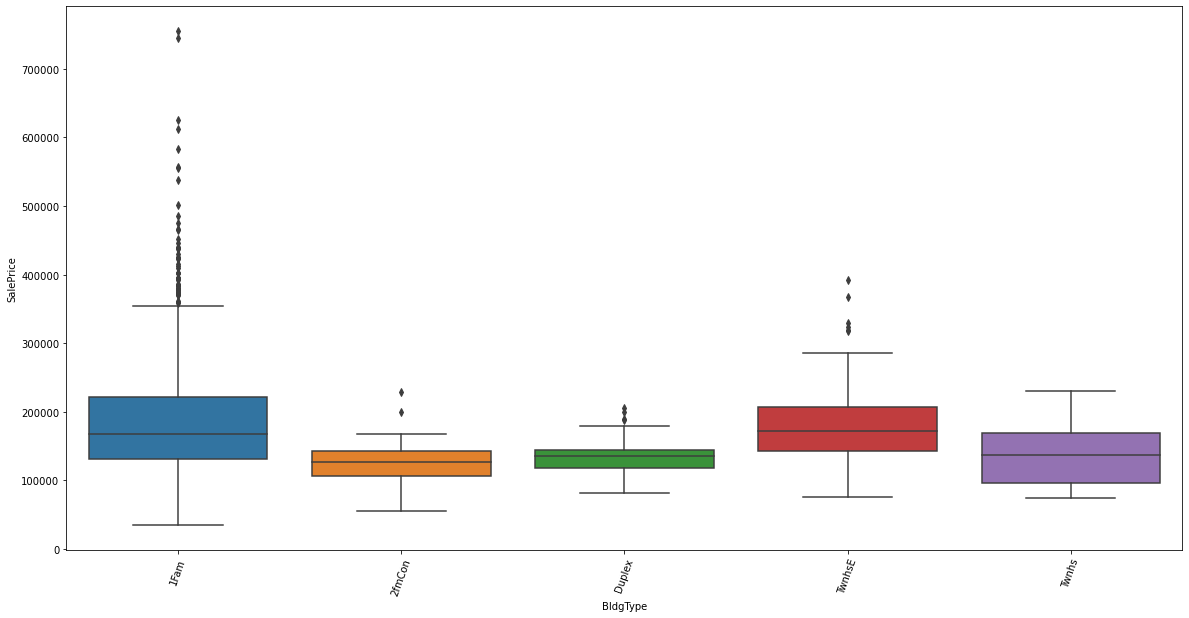

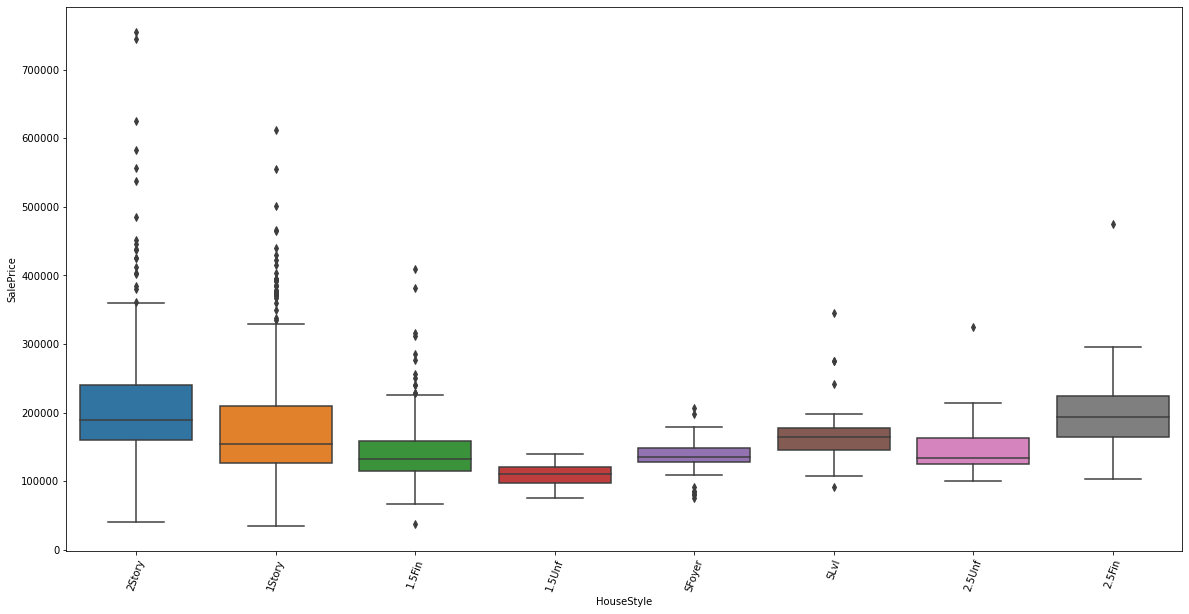

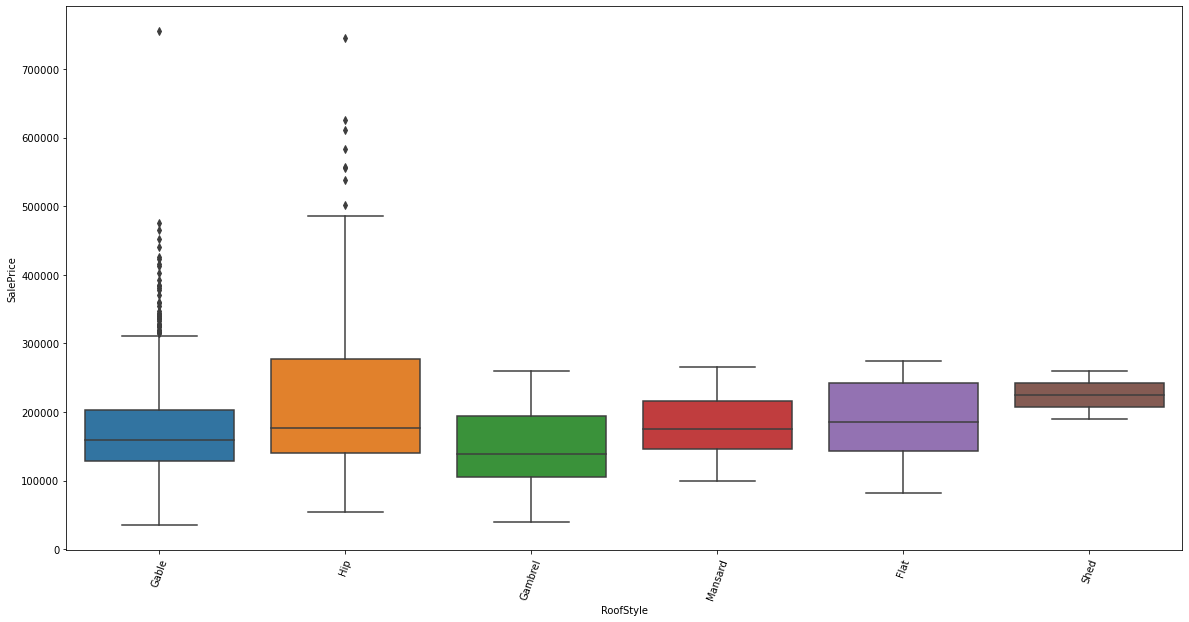

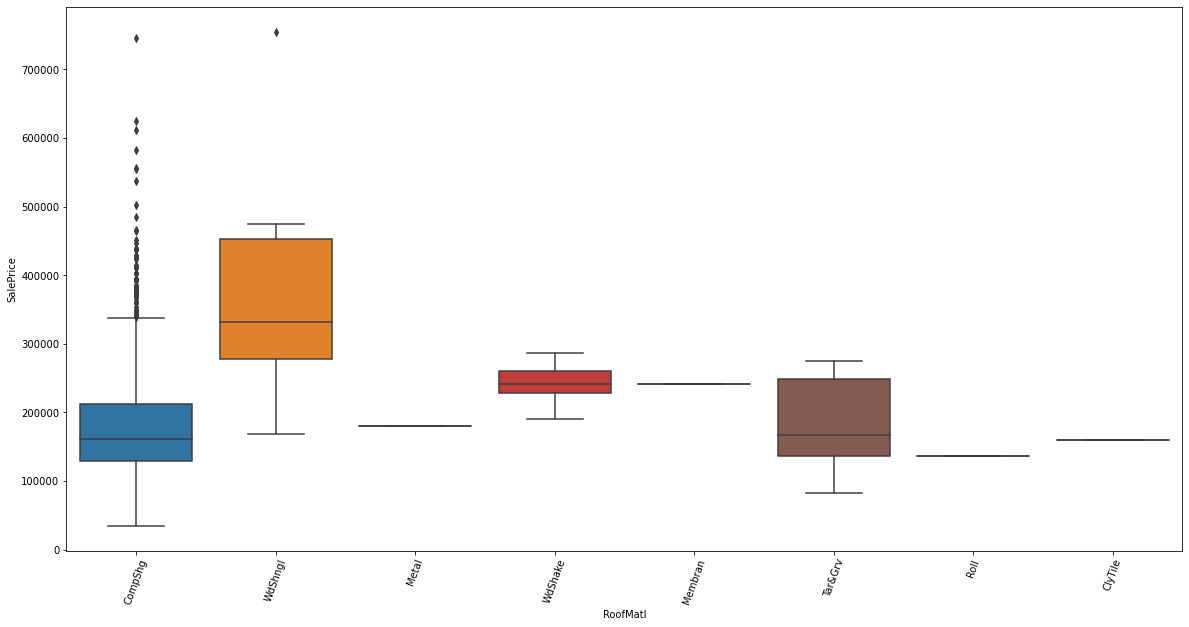

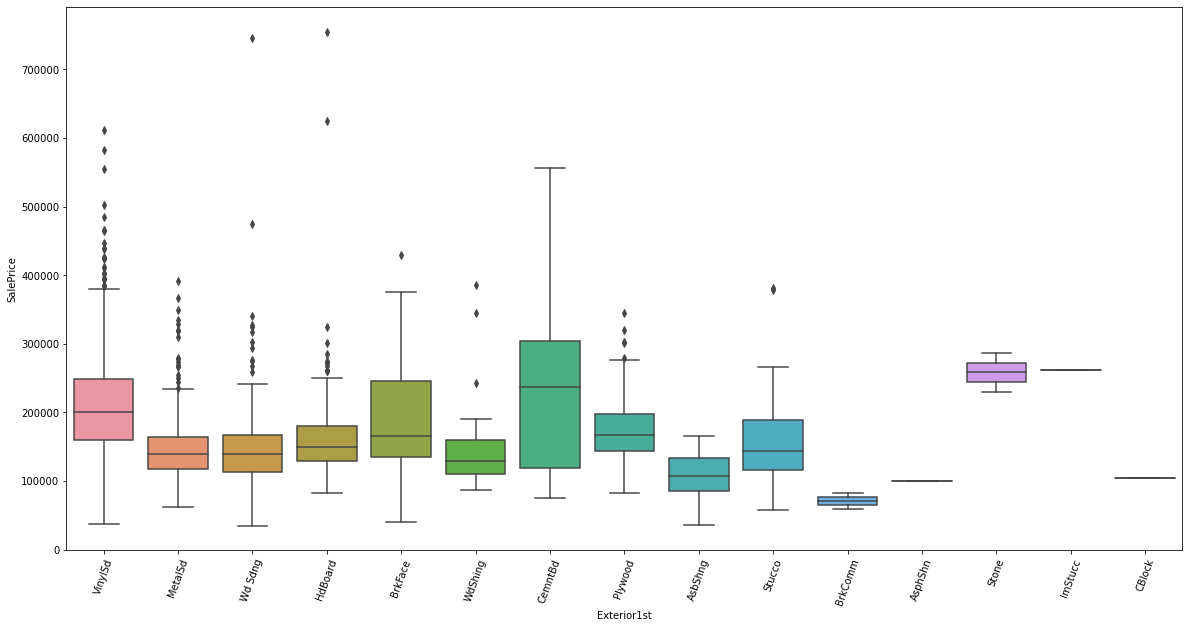

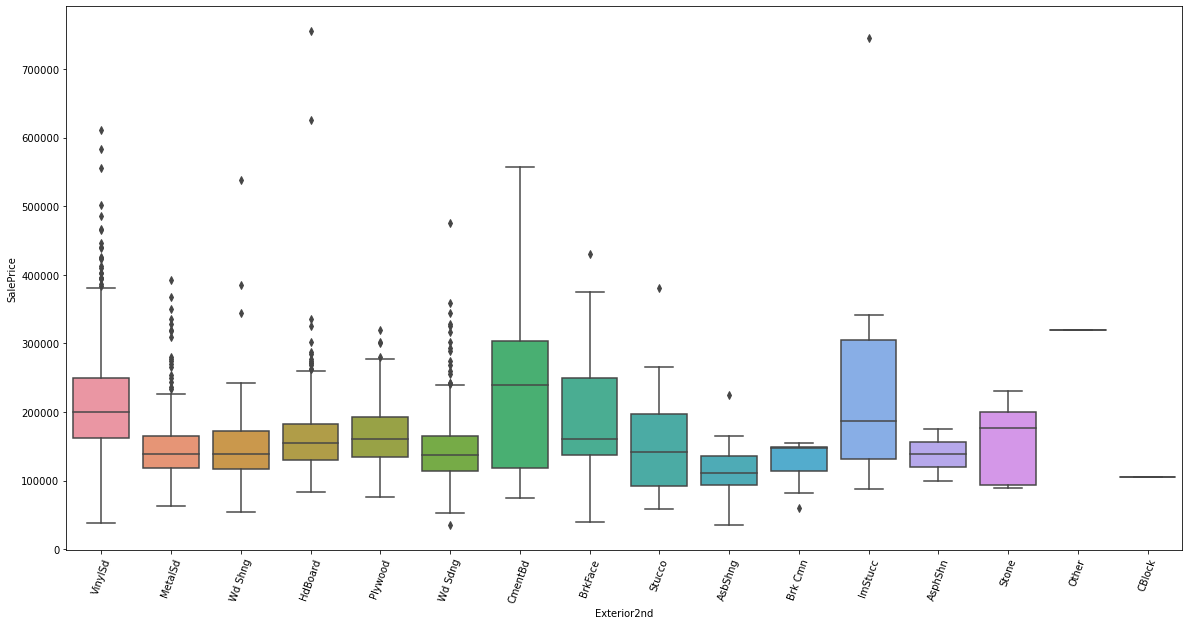

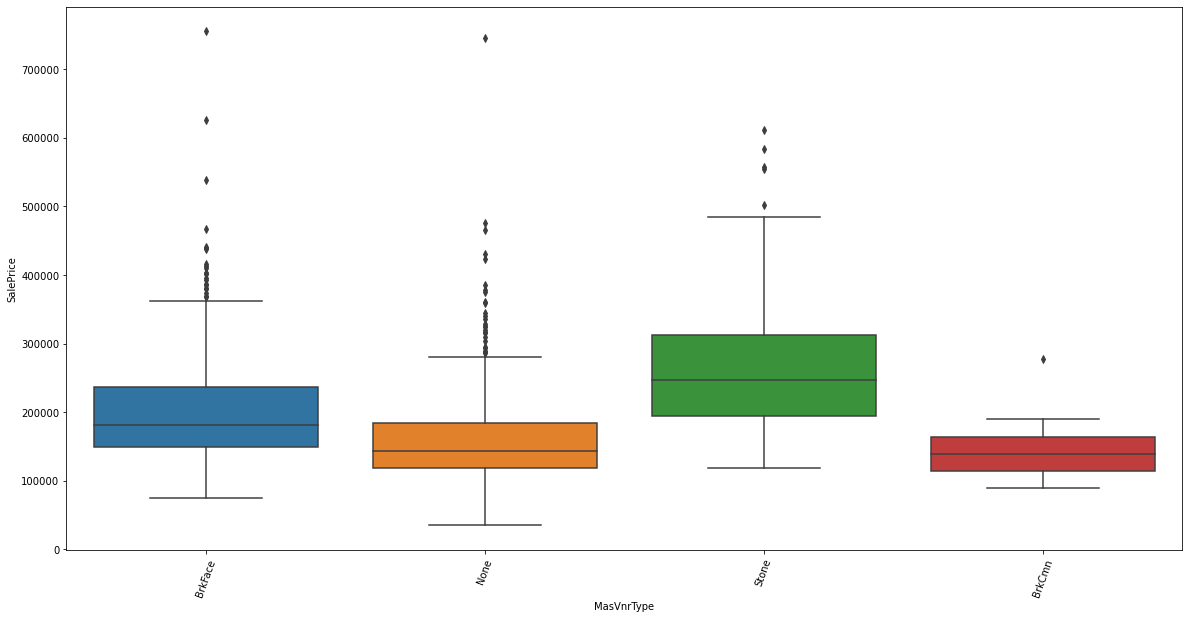

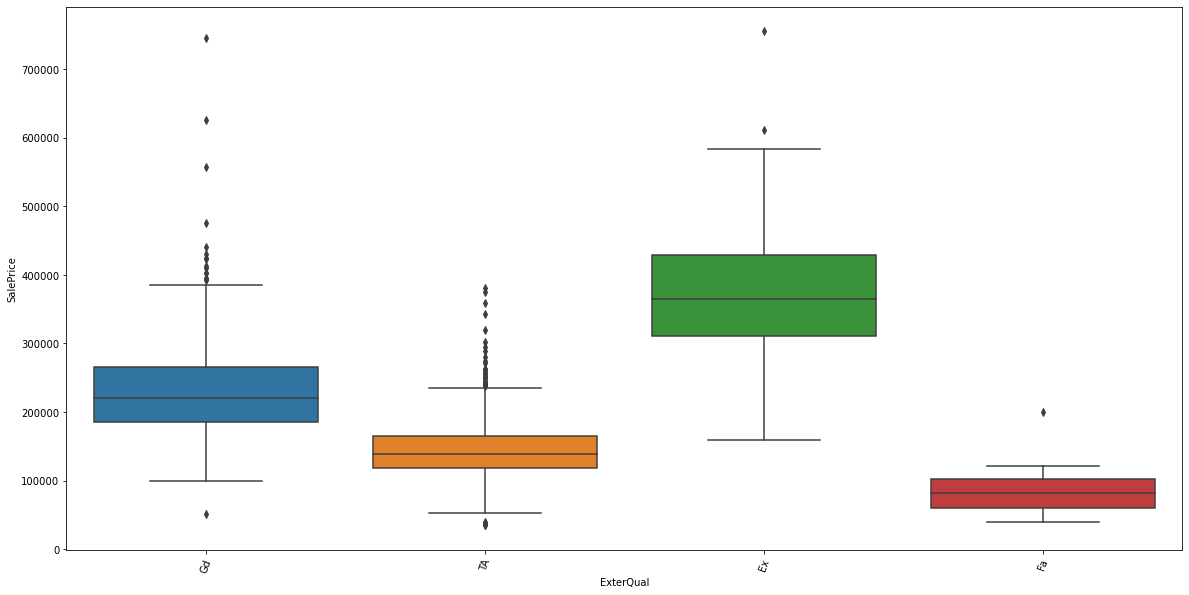

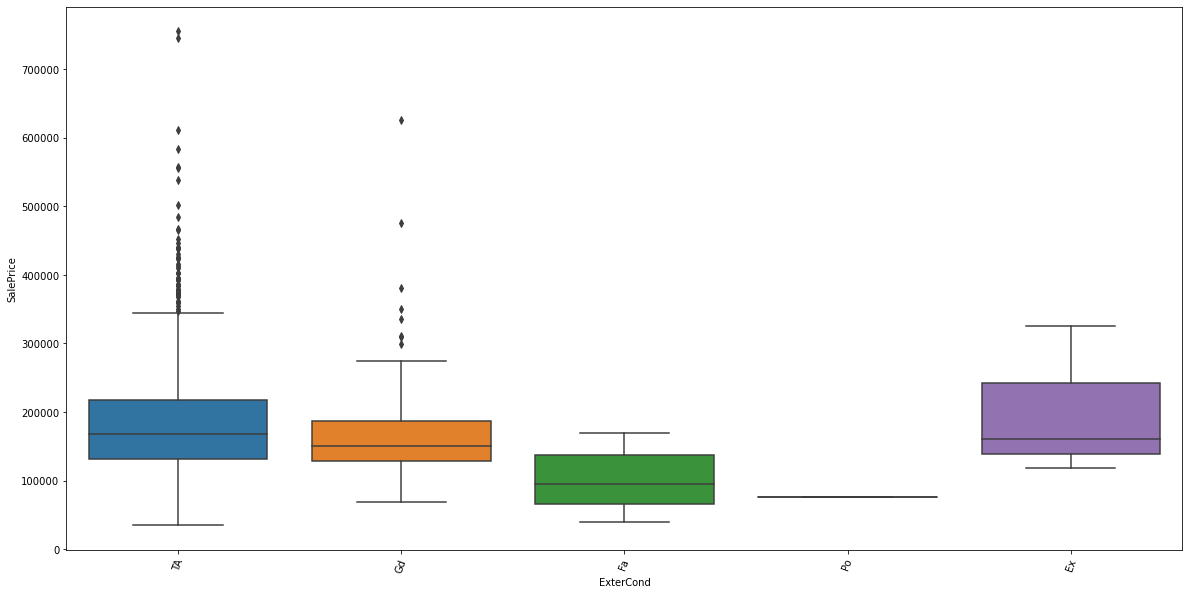

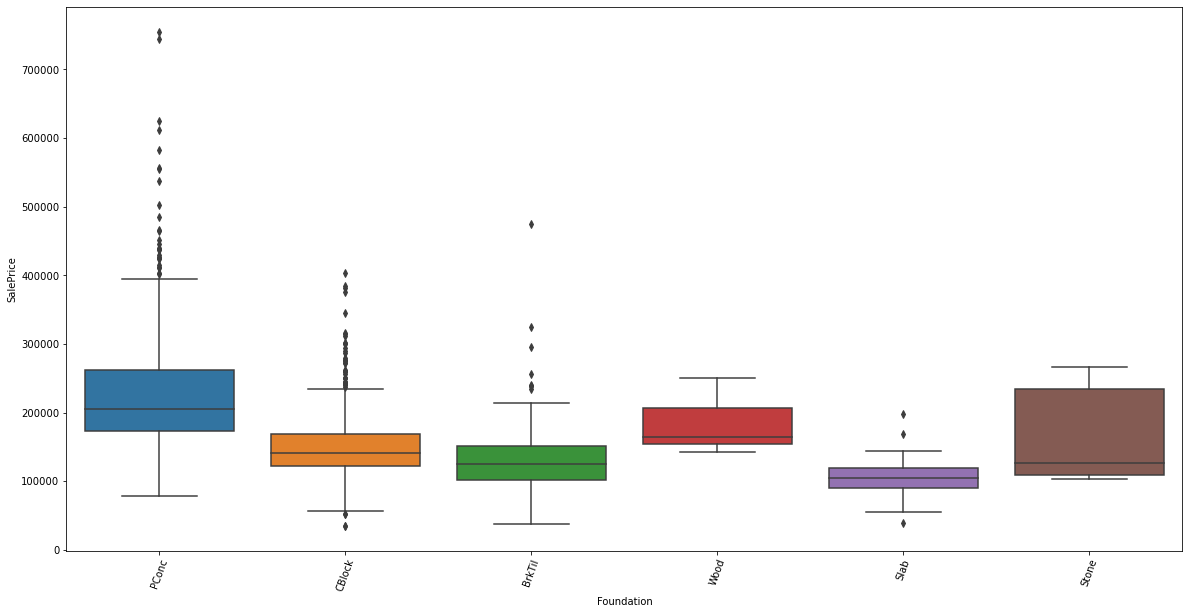

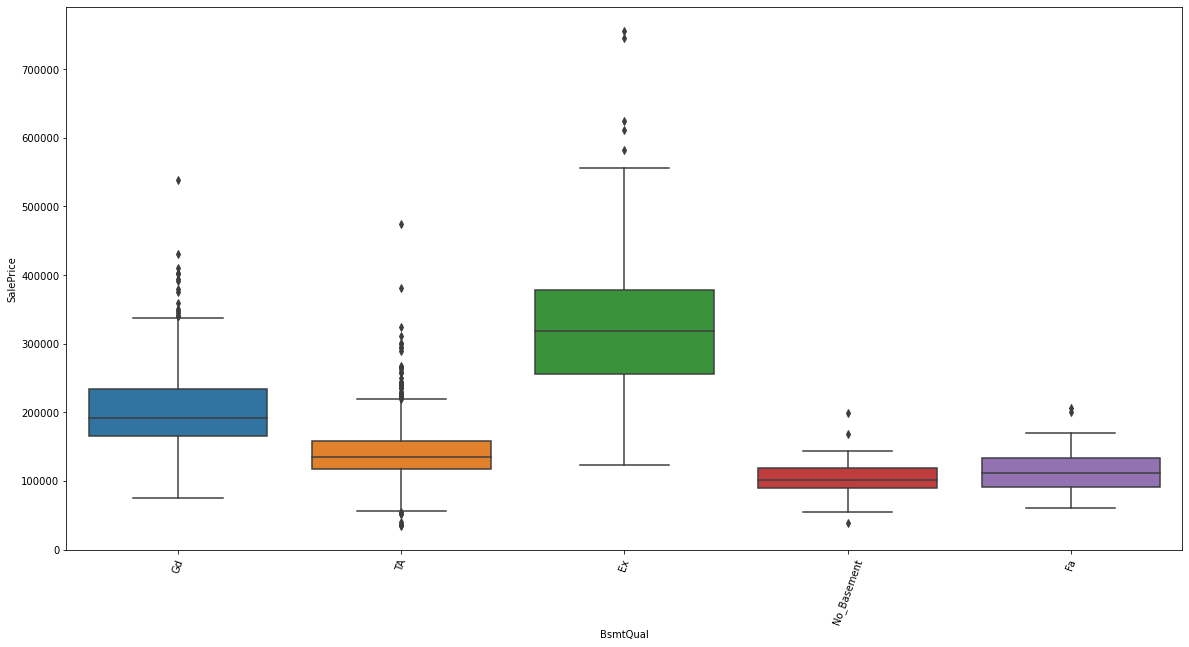

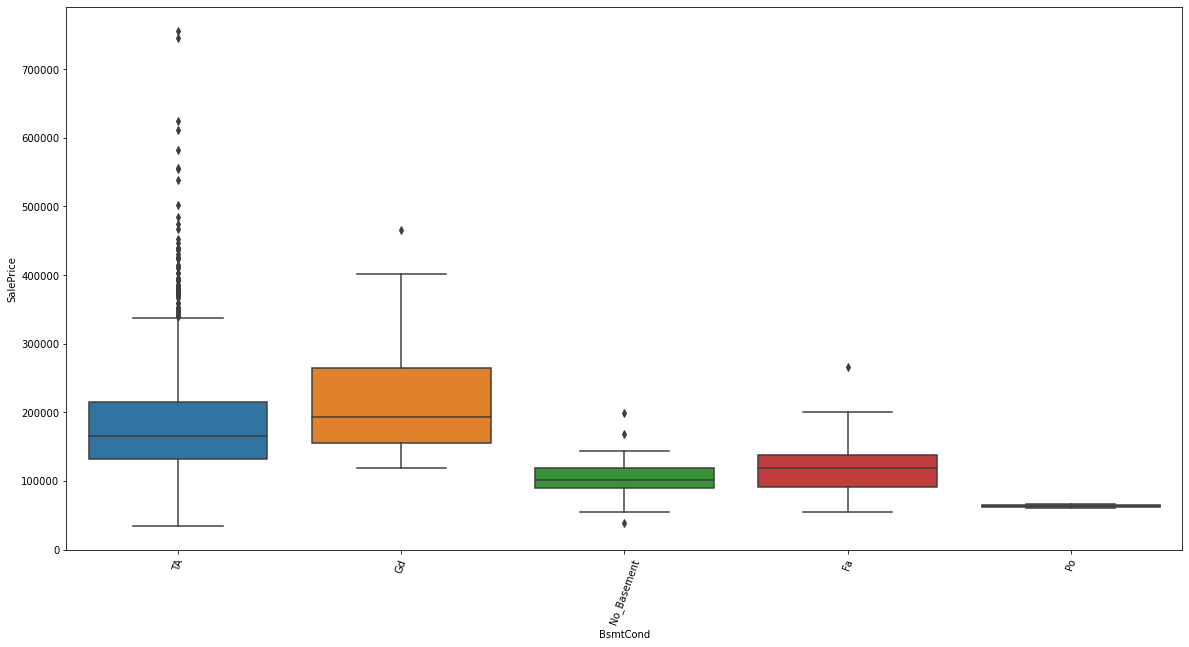

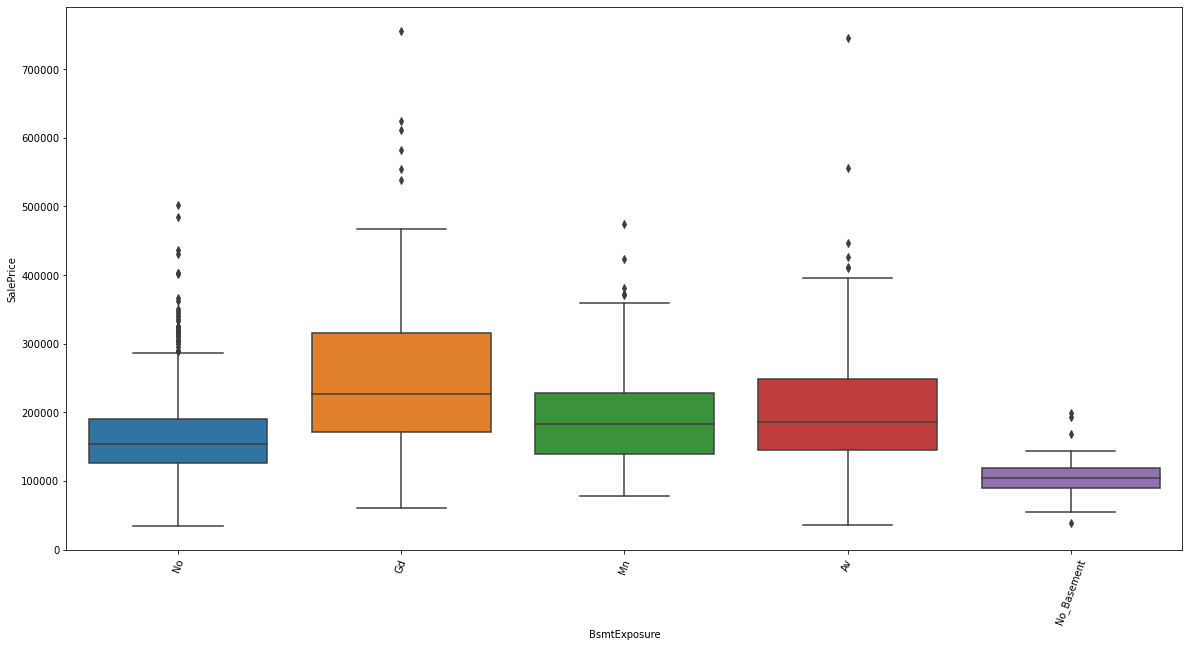

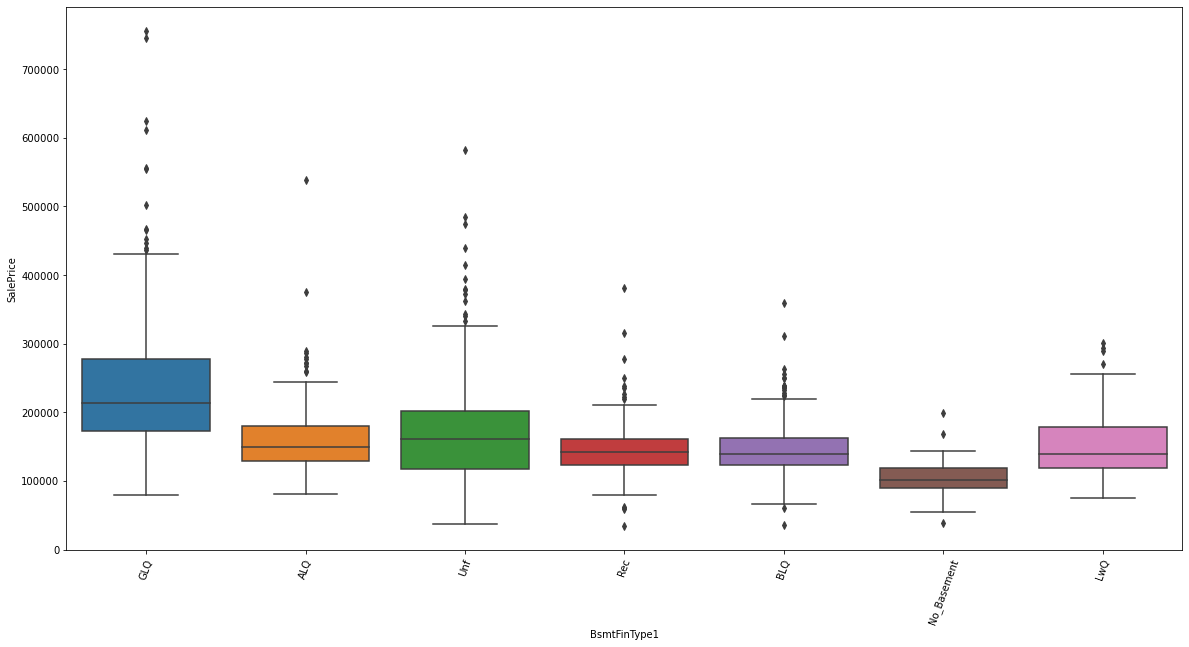

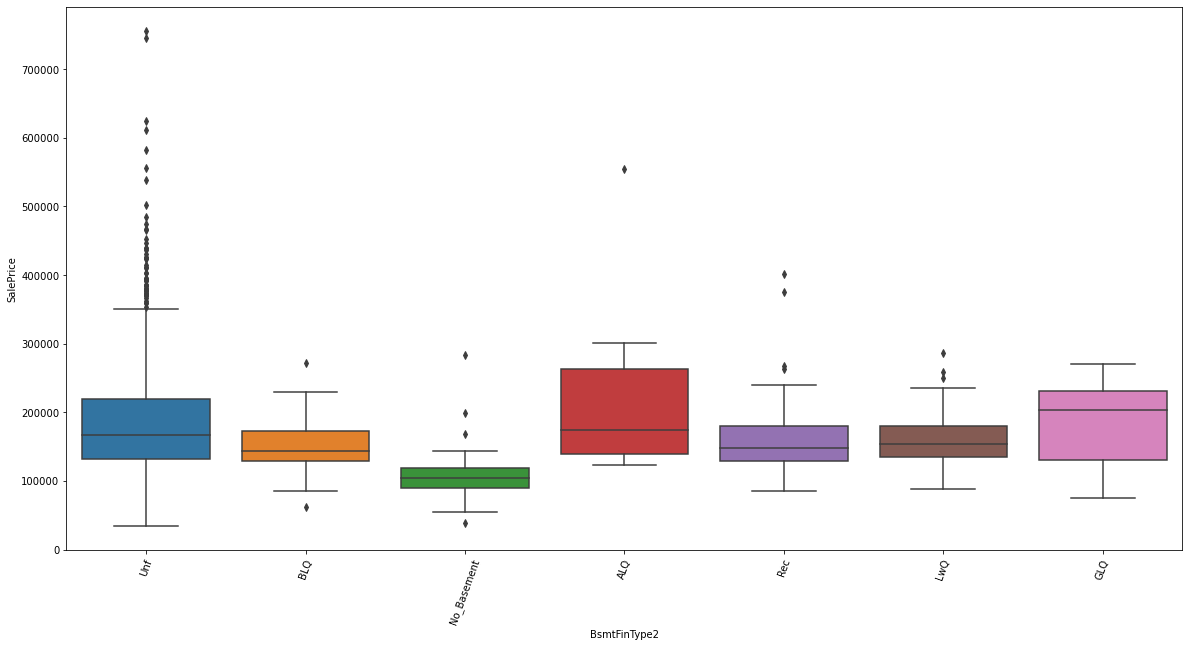

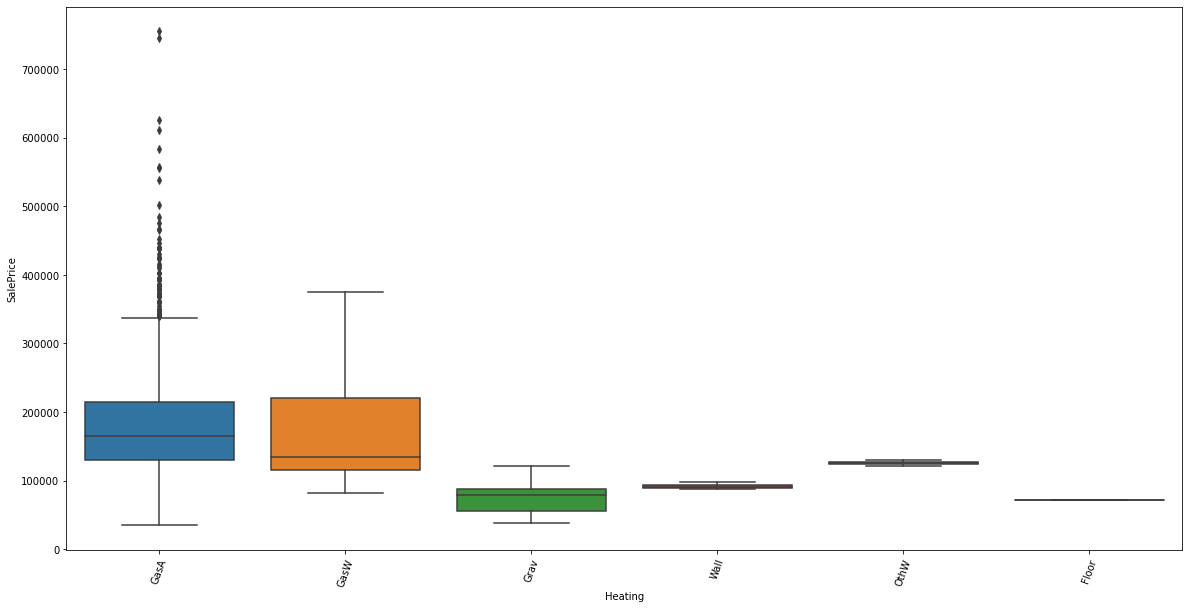

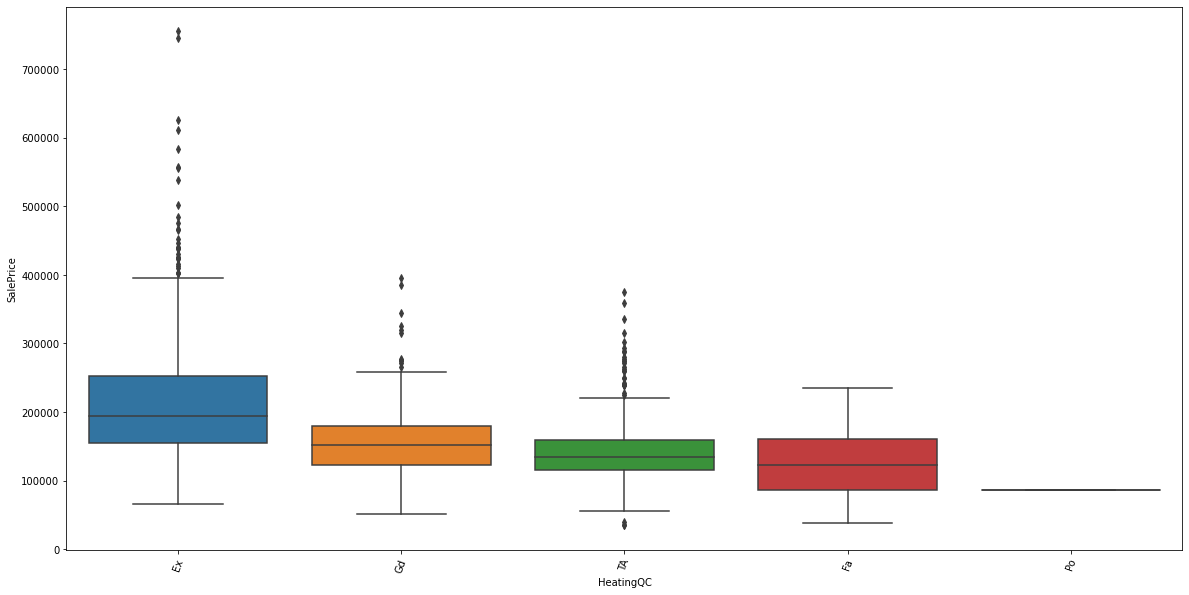

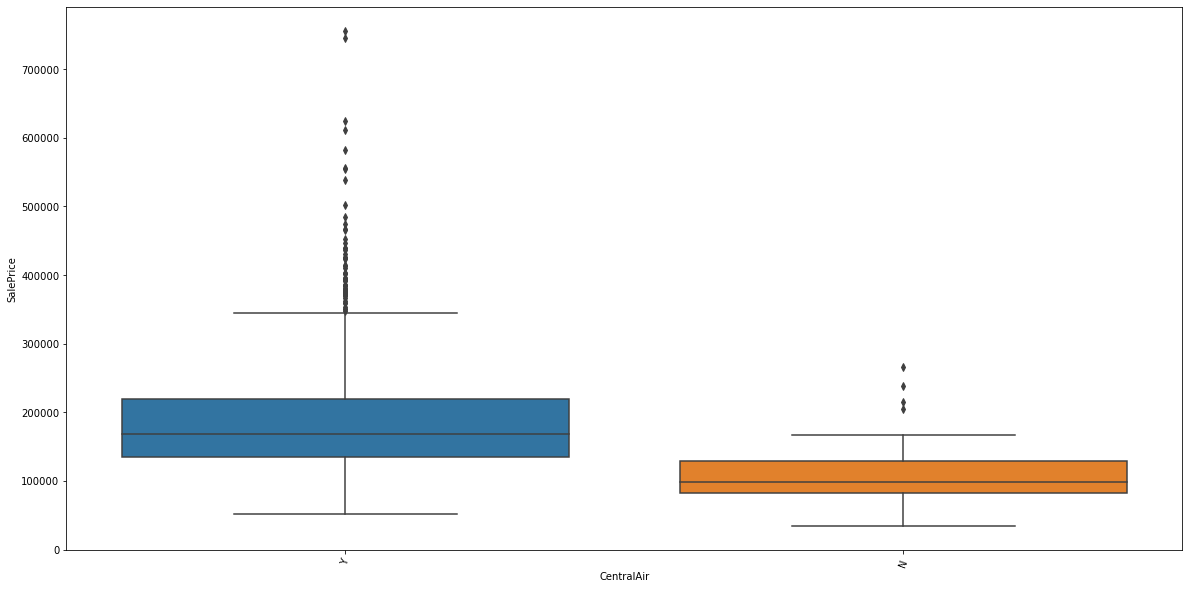

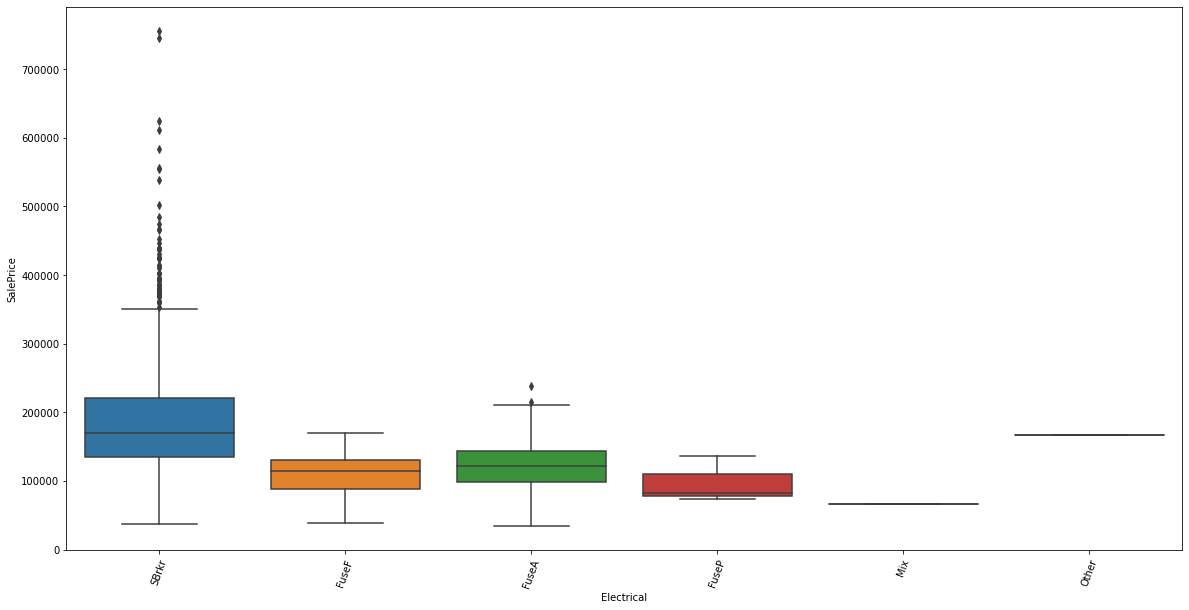

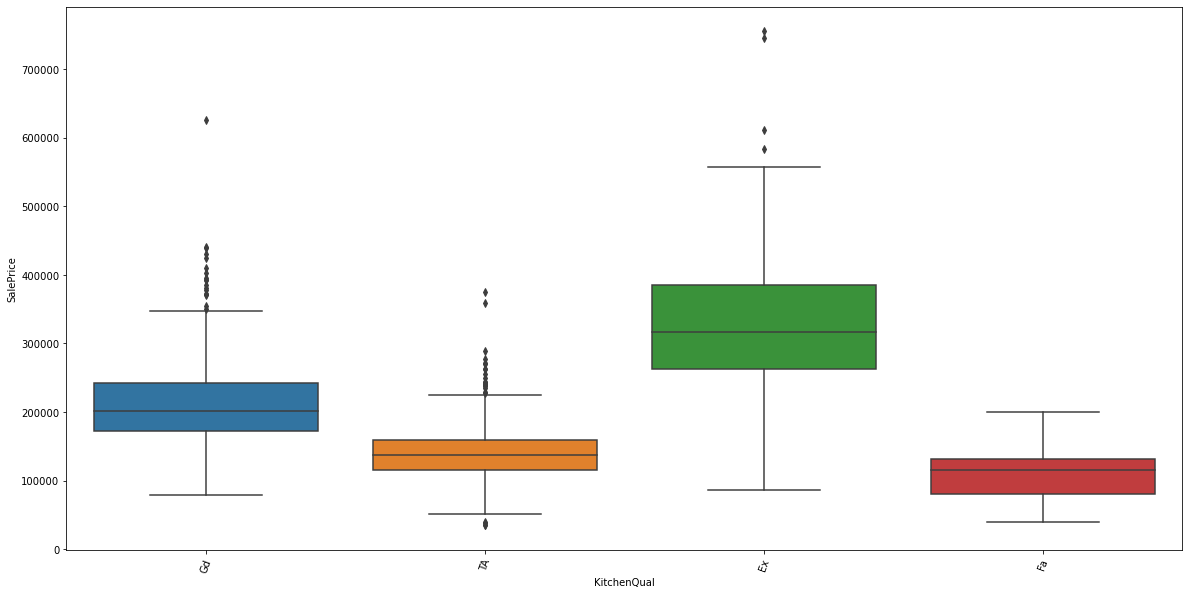

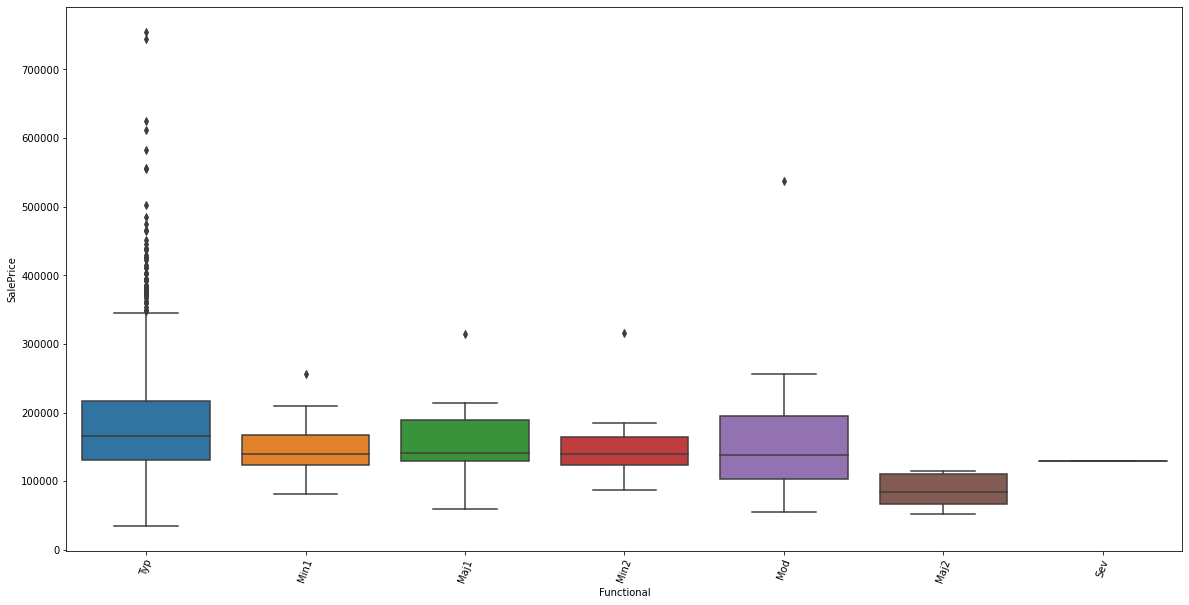

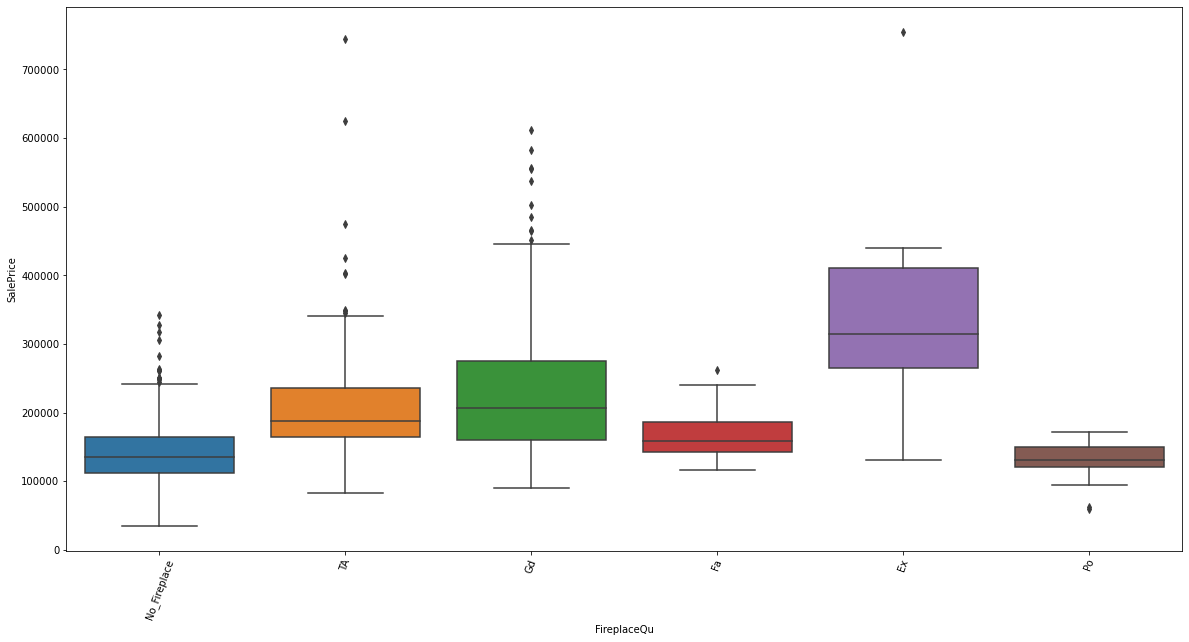

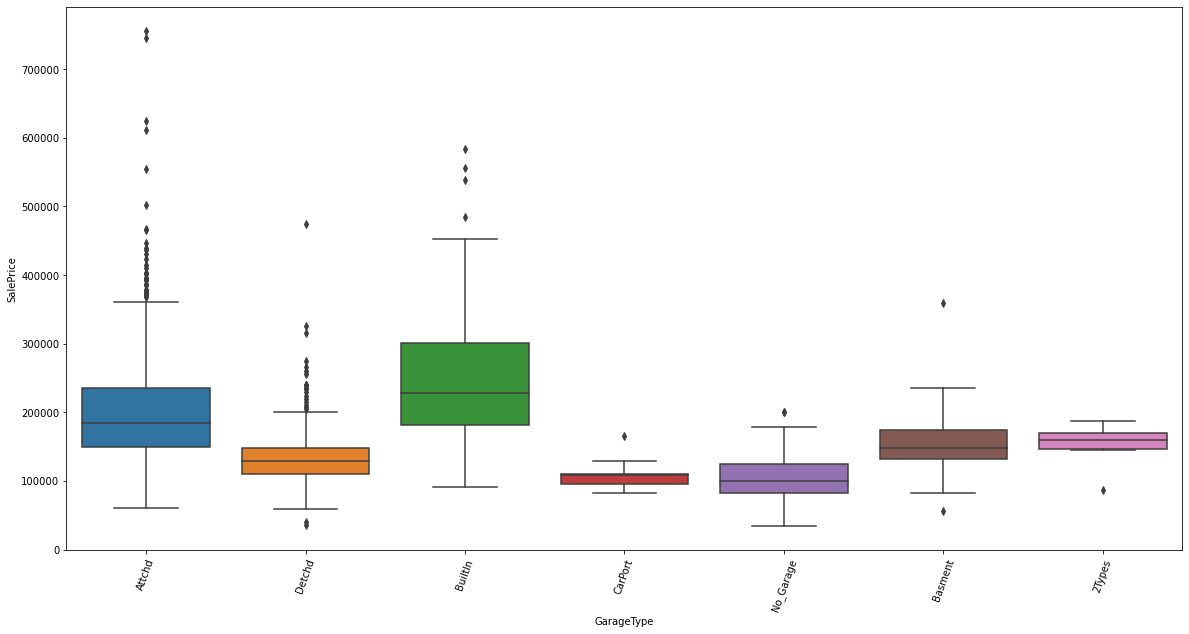

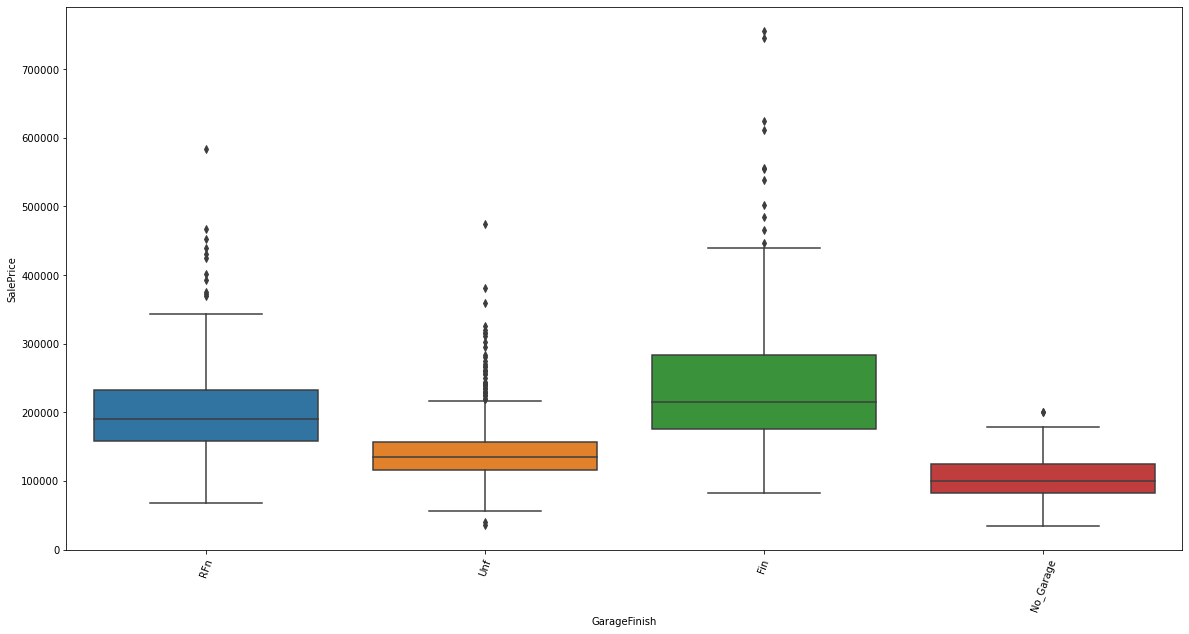

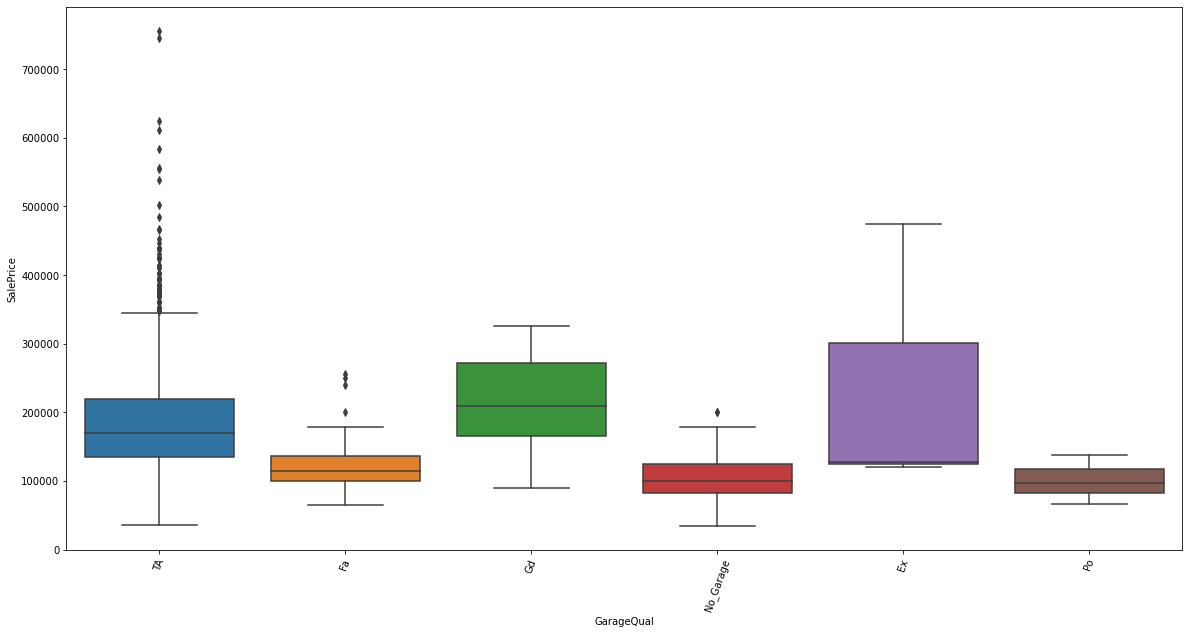

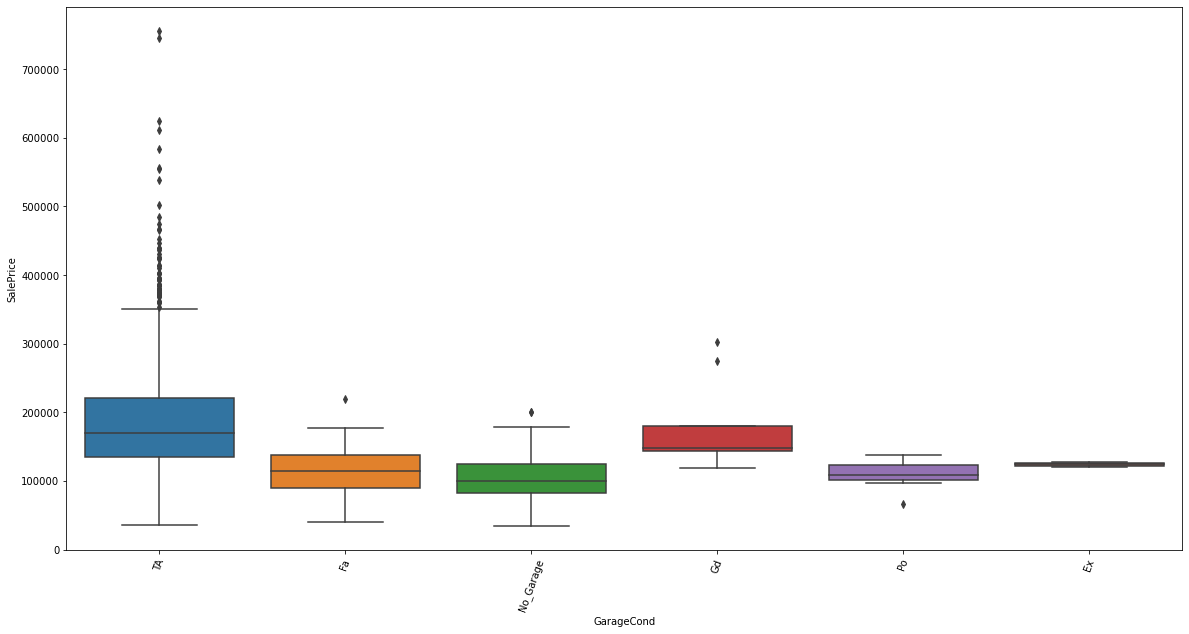

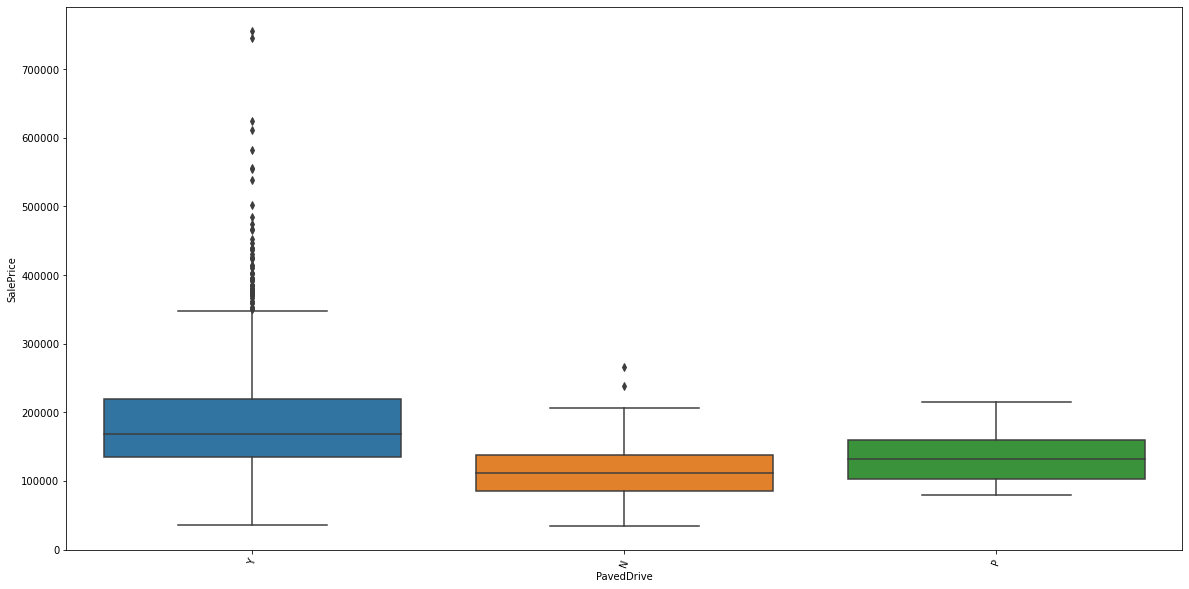

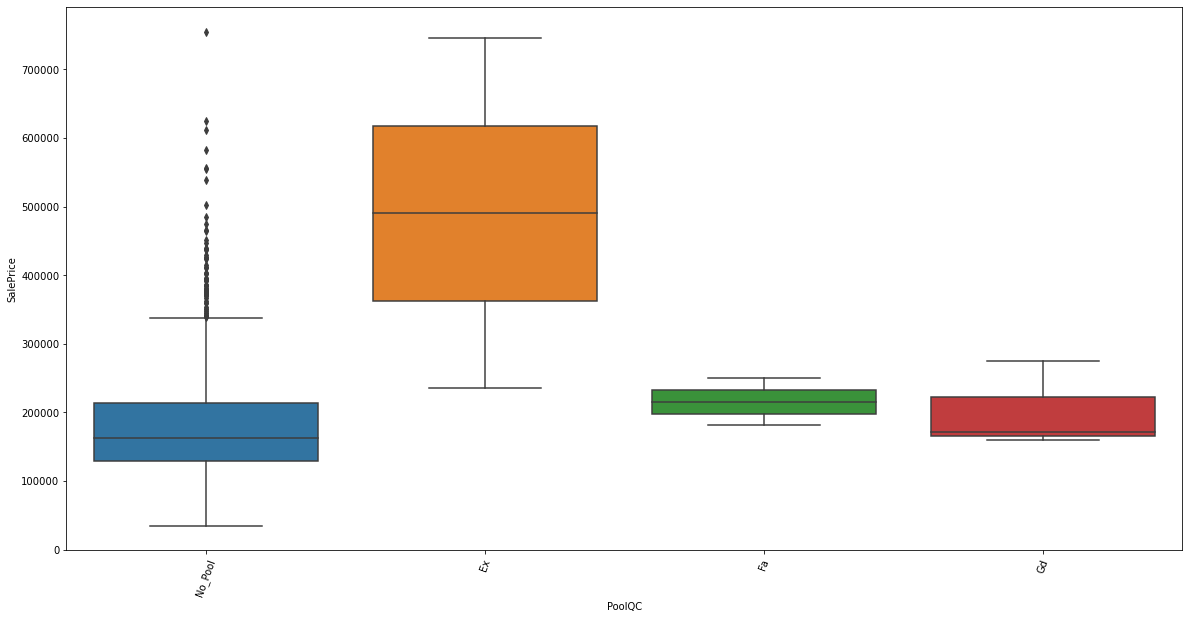

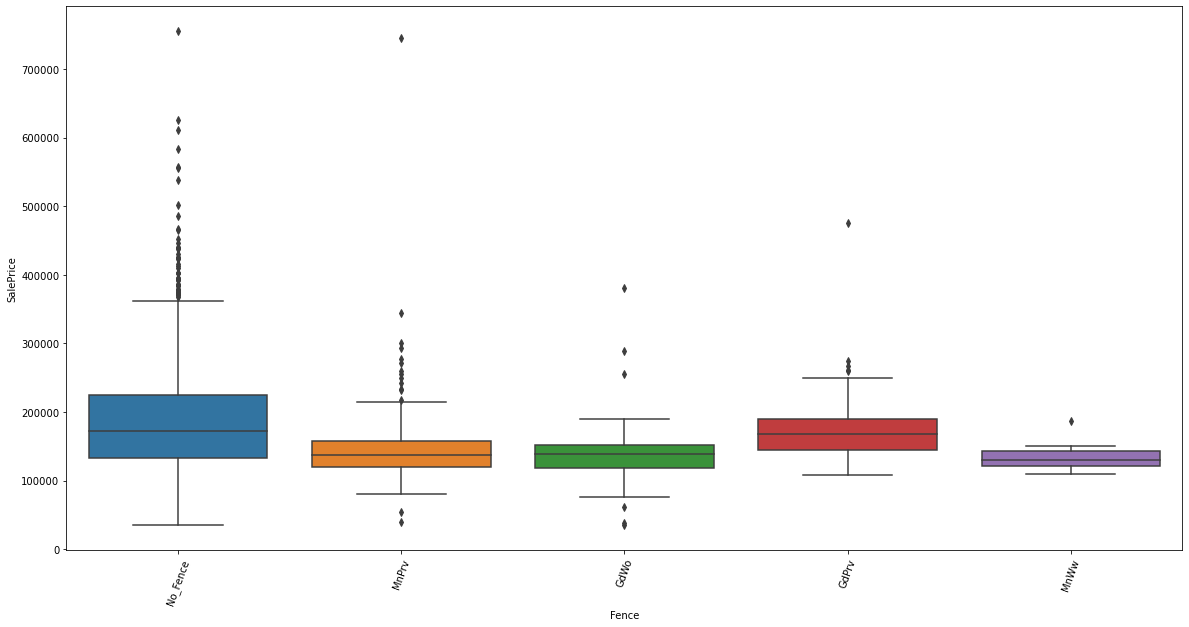

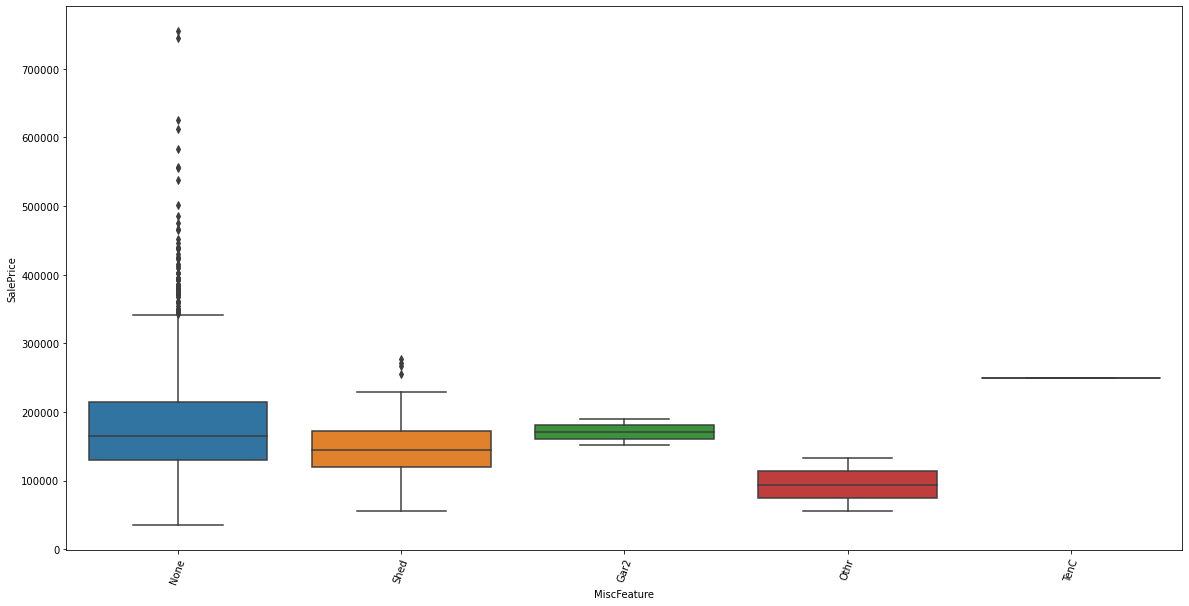

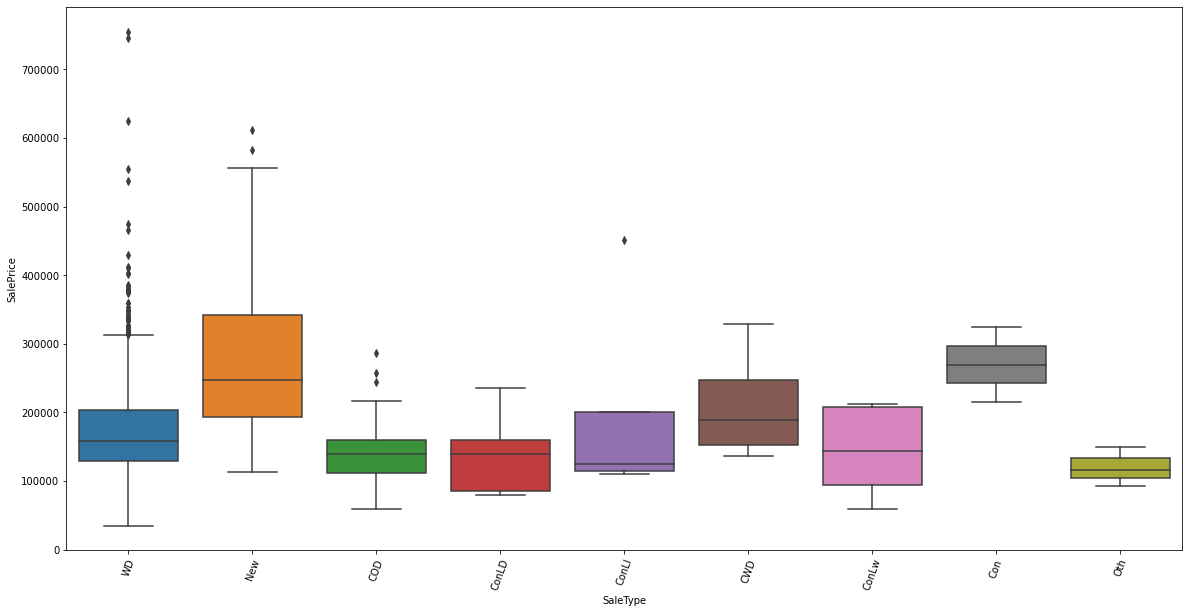

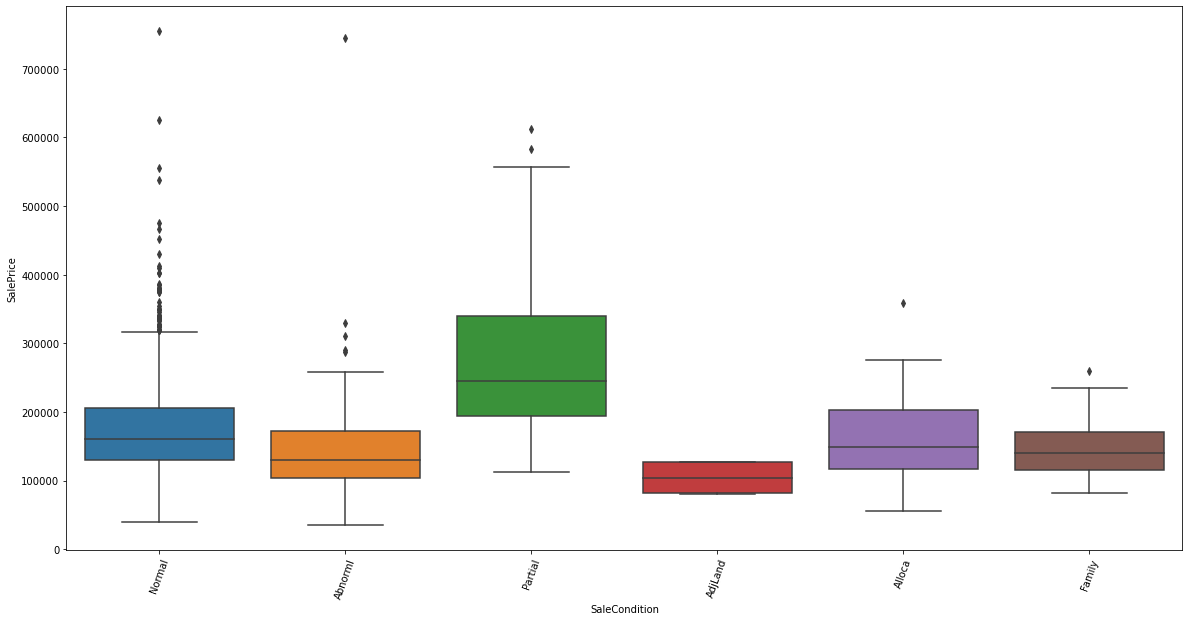

In [18]:
#Plotting all the Categorical Values against SalePrice
categorical_cols = df.select_dtypes(include=['object'])
for column in categorical_cols.columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(x=column, y="SalePrice", data=df)
    plt.xticks(rotation=70)

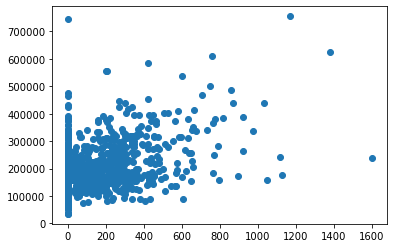

In [19]:
#scatterplot between Masonry veneer area in square feet and saleprice
plt.scatter(df['MasVnrArea'],df['SalePrice'])

Text(0.5, 1.0, 'Overall Condition')

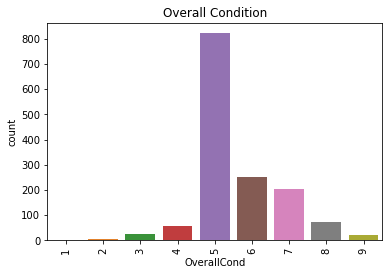

In [20]:
sns.countplot(x='OverallCond', data=df).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

               5 is most overall condition

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

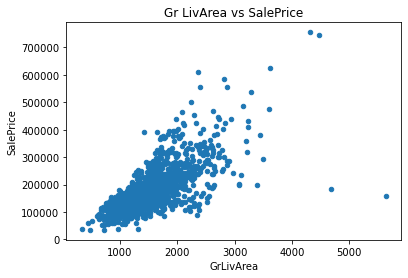

In [21]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');
plt.title('Gr LivArea vs SalePrice')

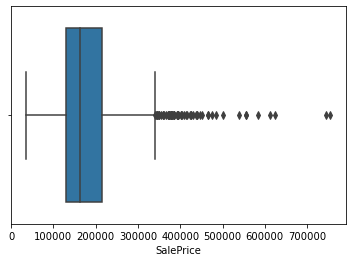

In [22]:
# Checking the outliers 
sns.boxplot(x='SalePrice', data=df)

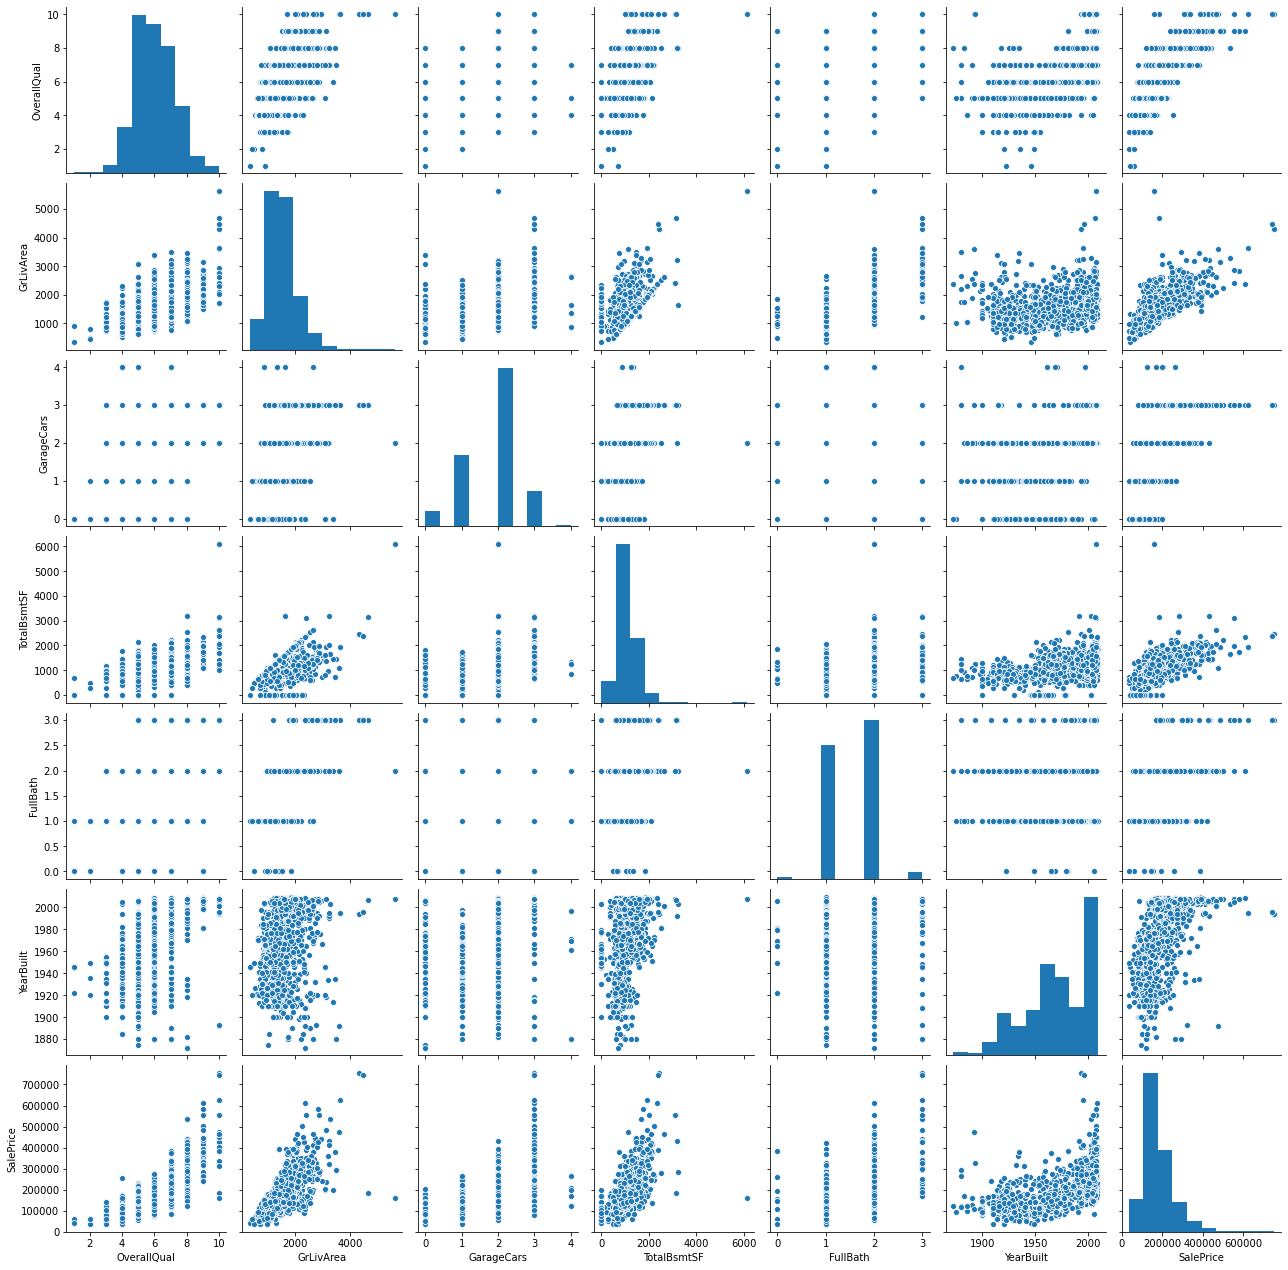

In [23]:
#scatterplot
cols = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','SalePrice']
sns.pairplot(df[cols])
plt.show()

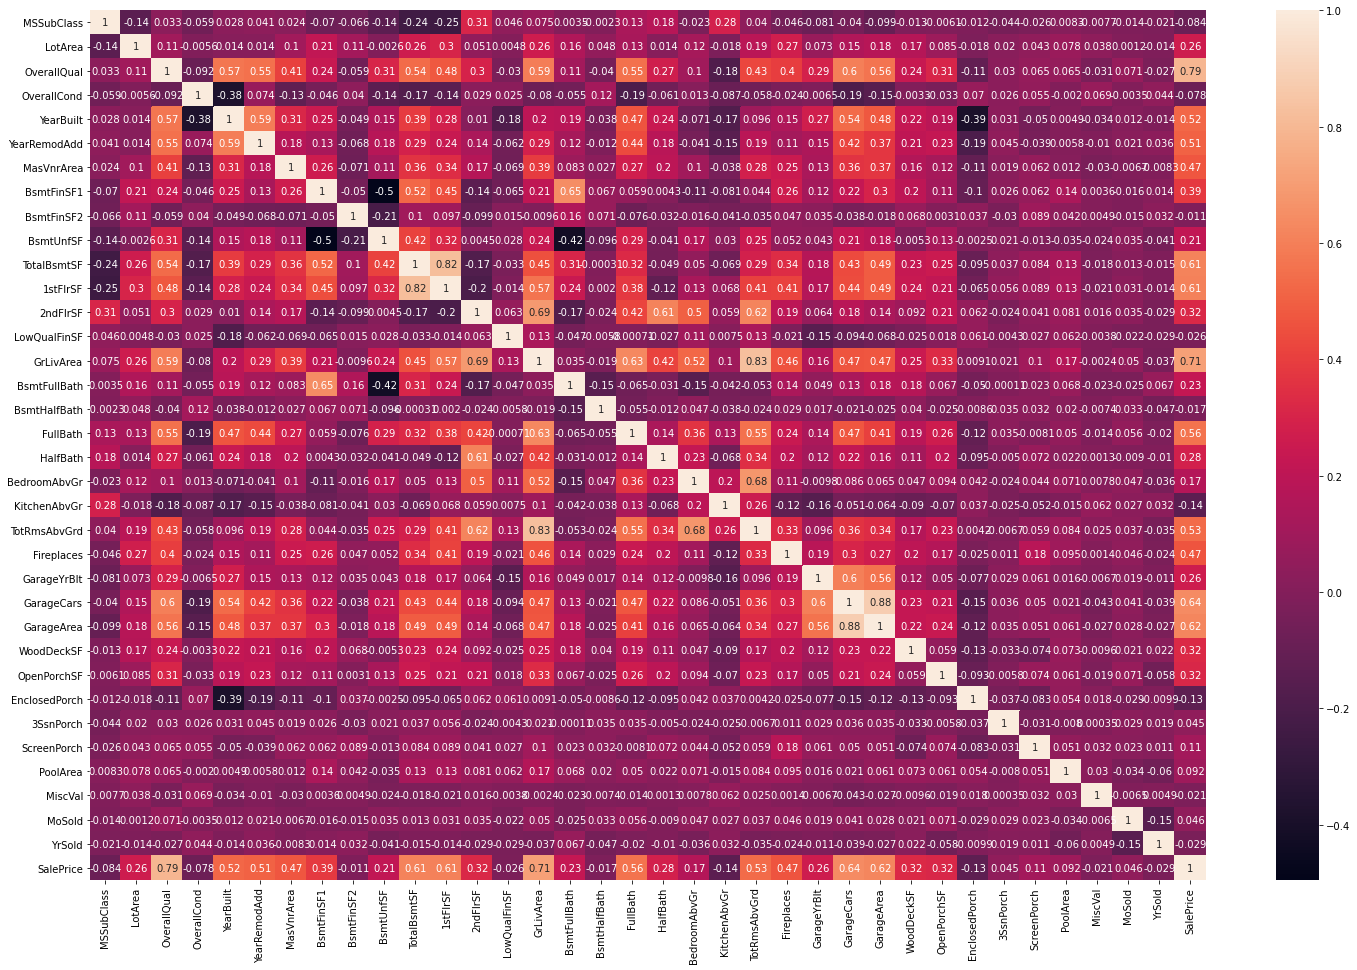

In [24]:
#the correlation matrix
cor = df.corr()
plt.figure(figsize=(25,16))
sns.heatmap(cor,annot=True)

In [25]:
#Converting a Binary varible into numeric
df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                                                 
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)  
df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )     

In [26]:
cat_values = df.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [27]:
#creating dummy values
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# Droping unwanted cols
df.drop(list(cat_values.columns),inplace=True, axis=1)

In [29]:
# appending dummy cols to df
df = pd.concat([df,data_dummies], axis=1)

In [30]:
#spliting df into training and testing
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [31]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",axis=1)

In [32]:
y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",axis=1)

In [33]:
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [34]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Redge Regression

In [35]:
#alpha values for tuning the model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08888098944882786


In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011766,0.003422,0.003996,1.085958e-03,0.0001,{'alpha': 0.0001},-0.091274,-0.095970,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.010166,0.001928,0.004588,1.017102e-03,0.0010,{'alpha': 0.001},-0.090983,-0.095920,-0.095063,-0.087130,...,-0.090319,0.005012,13,-0.054636,-0.055125,-0.055882,-0.056849,-0.055737,-0.055646,0.000748
2,0.009567,0.002245,0.004188,1.162778e-03,0.0100,{'alpha': 0.01},-0.090336,-0.095578,-0.094677,-0.086390,...,-0.089882,0.004969,8,-0.054827,-0.055242,-0.056021,-0.057084,-0.055876,-0.055810,0.000770
3,0.009974,0.001669,0.003789,7.459848e-04,0.0500,{'alpha': 0.05},-0.089986,-0.094656,-0.094106,-0.084322,...,-0.089209,0.004837,4,-0.055804,-0.055717,-0.056608,-0.057731,-0.056751,-0.056522,0.000733
4,0.011370,0.001493,0.004787,9.780119e-04,0.1000,{'alpha': 0.1},-0.089849,-0.094134,-0.094175,-0.082815,...,-0.088881,0.004961,1,-0.057018,-0.056194,-0.057298,-0.058636,-0.057873,-0.057404,0.000820
5,0.011171,0.003179,0.005784,1.716222e-03,0.2000,{'alpha': 0.2},-0.090371,-0.093811,-0.094777,-0.081243,...,-0.088886,0.005316,2,-0.059147,-0.056934,-0.058598,-0.060613,-0.059764,-0.059011,0.001236
6,0.011769,0.001596,0.005188,9.755620e-04,0.3000,{'alpha': 0.3},-0.090967,-0.093766,-0.095287,-0.080172,...,-0.089004,0.005682,3,-0.060826,-0.057553,-0.059779,-0.062291,-0.061428,-0.060376,0.001631
7,0.011968,0.003025,0.006582,1.352958e-03,0.4000,{'alpha': 0.4},-0.091500,-0.093849,-0.095743,-0.079512,...,-0.089267,0.005926,5,-0.062214,-0.058068,-0.060730,-0.063693,-0.062831,-0.061507,0.001973
8,0.009375,0.001621,0.002991,4.672031e-07,0.5000,{'alpha': 0.5},-0.091857,-0.093888,-0.096105,-0.079479,...,-0.089534,0.005980,6,-0.063437,-0.058535,-0.061536,-0.064837,-0.063983,-0.062466,0.002244
9,0.009973,0.001784,0.003590,4.885783e-04,0.6000,{'alpha': 0.6},-0.092051,-0.093944,-0.096400,-0.079521,...,-0.089741,0.006008,7,-0.064470,-0.058963,-0.062212,-0.065800,-0.064951,-0.063279,0.002463


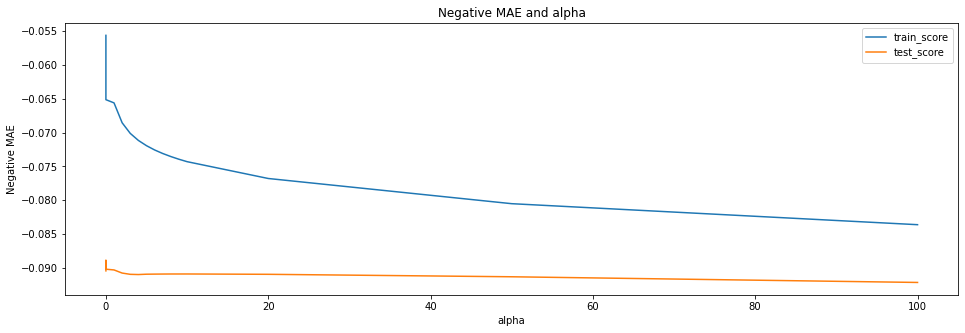

In [38]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MAE')
plt.title("Negative MAE and alpha")
plt.legend(['train_score', 'test_score'], loc='upper_right')
plt.show()

In [39]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588683e-02,  1.89916299e-02,  7.32788104e-03,  7.96272008e-02,
        4.07795269e-02,  3.72507374e-02,  2.05612877e-02, -2.78758819e-03,
       -1.30338491e-03,  7.00573179e-03,  4.35785540e-03,  5.54550229e-03,
        1.48199078e-02,  3.71802799e-02,  4.20642007e-02,  8.38654798e-04,
        6.23082078e-02,  2.96128365e-02,  2.70973194e-03,  1.87339625e-02,
        1.07448695e-02,  1.20910988e-02, -1.36071727e-02,  1.55763919e-02,
        2.26747431e-03, -1.68263637e-07,  4.02874958e-02,  4.26597599e-03,
        1.44157825e-03,  1.36107502e-02, -2.04563445e-03,  8.78571434e-03,
        7.21095211e-03,  1.06190229e-02, -1.48411310e-02, -1.44232684e-06,
       -1.10809910e-03, -6.42496907e-03,  4.82665535e-02,  3.90986114e-02,
        6.20215882e-02,  1.56874684e-02,  2.13182526e-03,  2.59755306e-02,
        2.43135413e-02, -5.00428493e-02,  4.82153805e-03,  3.82124377e-02,
        3.57786634e-02,  4.68949873e-02, -1.30779083e-02,  3.69460173e-02,
       -3.54873205e-02, -

In [40]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220052574594757


In [41]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855287818493235


In [42]:
# Printing the mean_squared_error value
mean_squared_error(y_test, y_test_pred)

0.018835107573615582

In [43]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

## Lasso Regression

In [44]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        return_train_score=True,
                        cv = folds, 
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [46]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08335757905208414


In [47]:
ridge_double_coef = ridge.coef_
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(10)

The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
Neighborhood_Crawfor,0.103582
Neighborhood_NridgHt,0.081037
OverallQual,0.079627
Neighborhood_Somerst,0.068628
GrLivArea,0.062308
MSZoning_RL,0.062022
Neighborhood_StoneBr,0.059838
Condition1_Norm,0.058896
Exterior1st_BrkFace,0.057761
SaleType_ConLD,0.056330


In [48]:
#final lasso model
alpha = 0.001
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [49]:
#R-squared value on tain_data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.917444257497289


In [50]:
#R-squared value on test_data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8551231928174823


In [51]:
mean_squared_error(y_test, y_test_pred)

0.023838046736017516

In [52]:
lasso.coef_

array([-1.58986880e-02,  1.77328839e-02,  7.45493006e-03,  8.92609173e-02,
        4.49733107e-02,  5.24420084e-02,  2.11904683e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73403190e-02,
        1.31726648e-02,  5.57365739e-04,  0.00000000e+00, -2.81043595e-03,
        1.18031173e-01,  3.11416982e-02,  2.03120136e-03,  1.33933861e-02,
        8.44317064e-03,  5.66696196e-03, -1.15603901e-02,  1.31358396e-02,
        6.75562031e-03, -1.47256115e-06,  3.89265887e-02,  5.91793364e-03,
        1.83237079e-03,  1.28752008e-02, -0.00000000e+00,  6.00119886e-03,
        5.33435901e-03,  1.05851336e-02, -1.35222907e-02, -9.35029429e-04,
       -1.36117711e-03, -5.93902219e-03,  0.00000000e+00,  0.00000000e+00,
        4.66696364e-02, -7.07128010e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49559431e-03, -0.00000000e+00,  2.89713629e-02,
       -0.00000000e+00, -

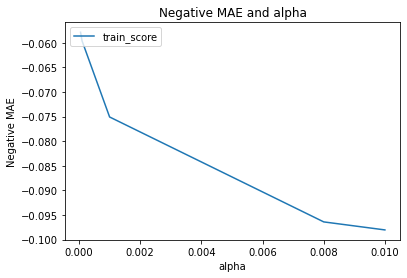

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative MAE')

plt.title("Negative MAE and alpha")
plt.legend(['train_score', 'test_score'], loc='upper left')
plt.show()

In [54]:
model_cv.best_params_

{'alpha': 0.1}

In [55]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9575101480652918
0.7491779353883934


In [56]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [57]:
ridge_coef.sort_values(by='Coef',ascending=False).head(20)

,Feaure,Coef
0,MSSubClass,10.861106
114,RoofMatl_Membran,0.434654
39,MSZoning_FV,0.401680
41,MSZoning_RL,0.401634
40,MSZoning_RH,0.396982
42,MSZoning_RM,0.354847
116,RoofMatl_Roll,0.307542
115,RoofMatl_Metal,0.303696
119,RoofMatl_WdShngl,0.294295
237,PoolQC_No_Pool,0.248244


In [58]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [59]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [60]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.917444257497289
0.8551231928174823


In [61]:
mean_squared_error(y_test, y_test_pred)

0.023838046736017516

## Conclusion

### For Lasso :
The best Alpha value =0.001
### For Ridge:
The best Alpha value= 0.1

#### following features explains most the dataset
- MSSubClass
- RoofMatl_Membran
- MSZoning_FV
- MSZoning_RL
- MSZoning_RH
- MSZoning_RM
- RoofMatl_Roll
- RoofMatl_Metal

In [62]:
#final ridge model
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.93345153e-02,  2.75425234e-02,  5.69261049e-03,  5.81393854e-02,
        3.73251885e-02,  5.10365146e-02,  2.16485329e-02, -3.81753853e-04,
        2.17530687e-02,  7.98988848e-03,  6.56753070e-03,  3.14186202e-02,
        1.31124230e-02,  4.60303479e-02,  4.69665049e-02,  1.33449572e-03,
        7.29850802e-02,  1.64260194e-02,  9.35623982e-04,  7.92163859e-03,
        2.92882624e-03,  1.01444695e-02, -1.41890970e-02,  4.59259535e-03,
       -2.84330285e-03, -2.55778534e-05,  2.25361500e-02,  1.55141518e-02,
        2.49358079e-03,  1.06628752e-02,  3.30112278e-03,  7.55987447e-03,
        5.42207416e-03,  8.54584568e-03,  6.47877628e-03,  2.38313422e-03,
        6.03069192e-04, -3.34175737e-03,  3.63079413e-01,  3.61341890e-01,
        3.68570213e-01,  3.26663897e-01,  1.87904440e-02,  3.57262991e-02,
        1.54946724e-02, -3.26921072e-02,  7.37684144e-03,  2.91413784e-02,
        2.88338133e-02,  4.18606809e-02, -9.88561615e-02,  3.15656728e-02,
       -4.79679080e-02, -

In [63]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7864035790812631


In [64]:
ridge_double_coef = ridge.coef_
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Alpha Co-Efficient after Doubling'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Alpha Co-Efficient after Doubling'], ascending=False,inplace=True)
ridge_double_coeff.head(5)

,Ridge Alpha Co-Efficient after Doubling
MSZoning_RL,0.368570
MSZoning_FV,0.363079
MSZoning_RH,0.361342
MSZoning_RM,0.326664
RoofMatl_Membran,0.319111


In [65]:
#final lasso model
alpha = 0.002
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [66]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8774018105216188


In [67]:
lasso3_coef = lasso.coef_
y_test_pred = lasso.predict(X_test)
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient after Doubling'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient after Doubling'], ascending=False,inplace=True)
lasso3_coeff.head(5)

,Lasso Co-Efficient after Doubling
OverallQual,0.102857
GrLivArea,0.101971
Neighborhood_Crawfor,0.068405
Neighborhood_NridgHt,0.057354
Neighborhood_Somerst,0.055390
